# Resilience Assessment and Commuting Flow Redistribution Modeling of London Underground Network: A Topological and Weighted Network Analysis

## Part 1: London’s underground resilience

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import itemgetter
import csv

In [13]:
#OK, let us start with the graphml file for London's underground
G = nx.read_graphml('london_tubenetwork.graphml')

# list all operations of the G object
print(len(dir(G)))
for i in np.random.randint(0, len(dir(G)), 10): #随机生成10个数，在0-dir(G)之间。
    print(dir(G)[i])


76
number_of_nodes
__str__
is_directed
to_directed_class
__dict__
__getattribute__
add_node
__init_subclass__
__iter__
__ne__


In [14]:
# Print number of nodes and edges
print(G.number_of_nodes())
print(G.number_of_edges())

438
486


In [15]:
# To check node attributes:
list(G.nodes(data = True))[0]

('910GCAMHTH',
 {'station_name': 'Cambridge Heath',
  'lines': 'London Overground',
  'coords': '(534825.0140298002, 183290.813466997)'})

In [16]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

# To check node attributes:
list(G.nodes(data = True))[0]

('910GCAMHTH',
 {'station_name': 'Cambridge Heath',
  'lines': 'London Overground',
  'coords': (534825.0140298002, 183290.813466997)})

In [17]:
# To check edges attributes:
list(G.edges(data = True))[0]

('910GCAMHTH',
 '910GBTHNLGR',
 {'length': 1076.0822006959384,
  'name': 'London Overground',
  'line_id': 'LeaValleyLine1'})

In [18]:
# we can also add the stations name to the edge attributes from the nodes attributes:

nod_name1={(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2={(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G,nod_name1,'station_1_')
nx.set_edge_attributes(G,nod_name2,'station_2_')

In [19]:
# To check edges attributes:
list(G.edges(data = True))[0]

('910GCAMHTH',
 '910GBTHNLGR',
 {'length': 1076.0822006959384,
  'name': 'London Overground',
  'line_id': 'LeaValleyLine1',
  'station_1_': 'Cambridge Heath',
  'station_2_': 'Bethnal Green'})

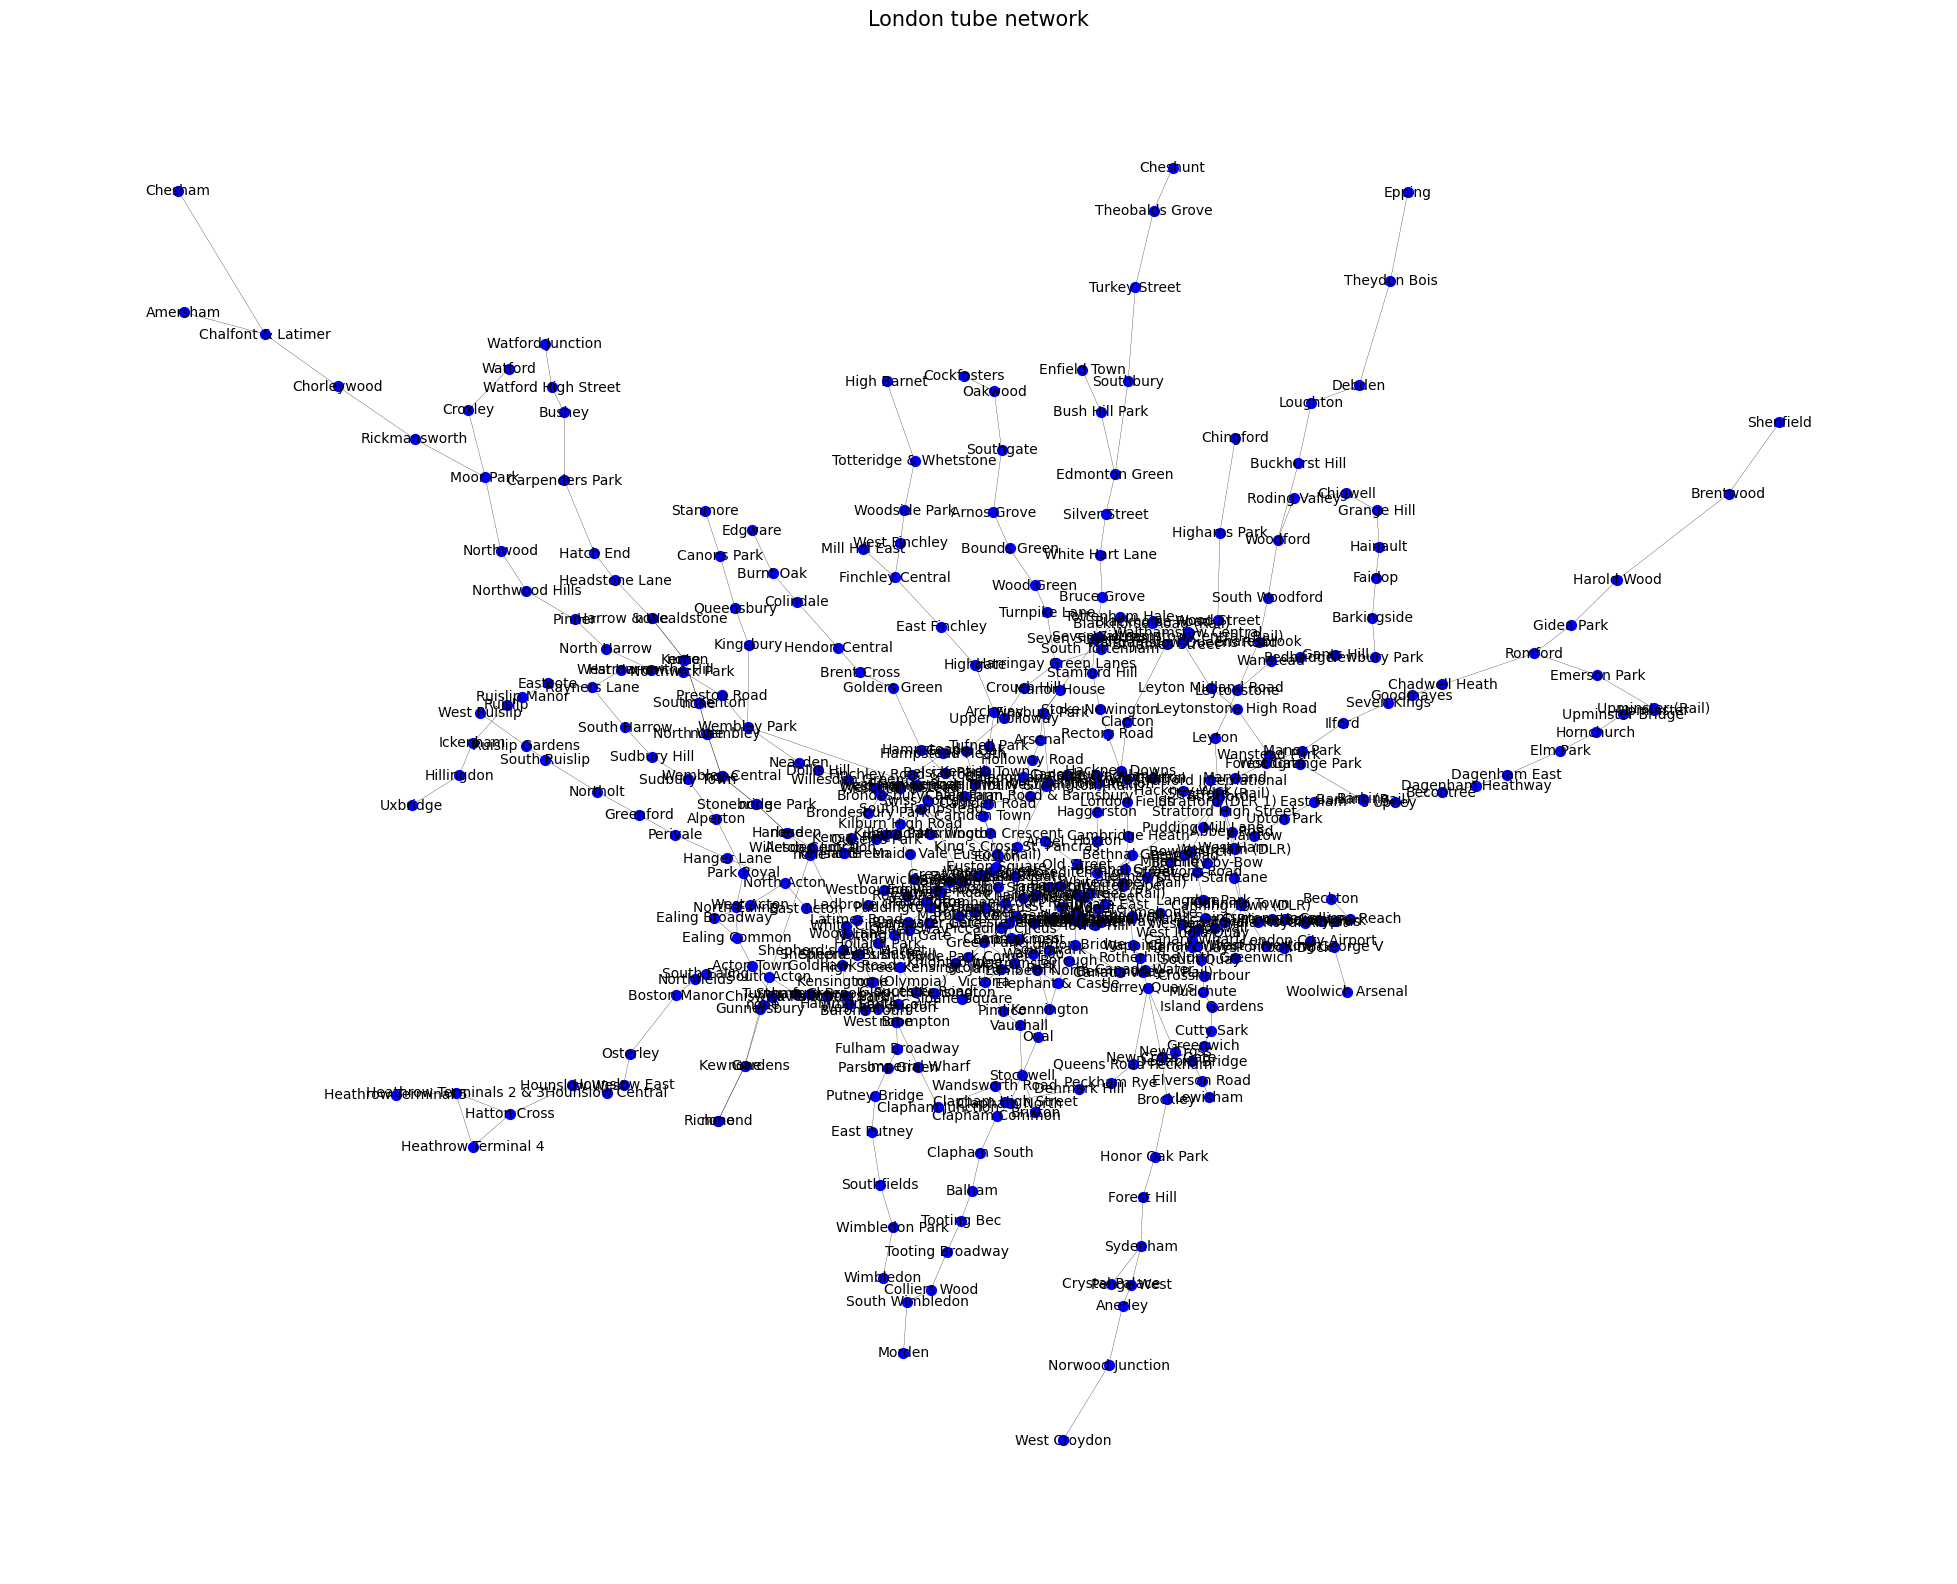

In [21]:
# Let's plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

In [22]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

source       target       station_1_               name  \
0   910GCAMHTH  910GBTHNLGR  Cambridge Heath  London Overground   
1   910GCAMHTH  910GLONFLDS  Cambridge Heath  London Overground   
2  910GBTHNLGR    910GLIVST    Bethnal Green  London Overground   
3  910GBTHNLGR  940GZZLUBLG    Bethnal Green                NaN   
4  910GLONFLDS  910GHAKNYNM    London Fields  London Overground   
5  910GHAKNYNM  910GRCTRYRD    Hackney Downs  London Overground   
6  910GHAKNYNM  910GCLAPTON    Hackney Downs  London Overground   
7  910GRCTRYRD  910GSTKNWNG     Rectory Road  London Overground   
8  910GSTKNWNG  910GSTMFDHL  Stoke Newington  London Overground   
9  910GSTMFDHL  910GSEVNSIS    Stamford Hill  London Overground   

                station_2_       length         line_id  
0            Bethnal Green  1076.082201  LeaValleyLine1  
1            London Fields   970.949720  LeaValleyLine2  
2  Liverpool Street (Rail)  1813.304143       LivStBeth  
3            Bethnal Green   481.514661             NaN  
4            Hackney Downs   917.502798  LeaValleyLine3  
5             Rectory Road  1178.231752  LeaValleyLine4  
6                  Clapton  1432.298268  ChingfordSpur1  
7          Stoke Newington   775.442407  LeaValleyLine5  
8            Stamford Hill  1200.722885  LeaValleyLine6  
9     Seven Sisters (Rail)  1001.203674  LeaValleyLine7

## 1.1 Typological Network (No-Weighted)

This study will employ eigenvector centrality, betweenness centrality, and closeness centrality as metrics to measure the importance of nodes.

### 1.1.1 Calculating Centralities of Eigenvector, Betweenness, Closeness

#### 1.1.1.1 Eigenvector Centrality

Eigenvector centrality, initially proposed by Bonacich (1972), enhances the degree centrality concept to recognize "influential centers" in networks. Ruhnau (2000) notes that it depends not only on a node’s number of links but also on the centrality of its connected nodes. The formula:

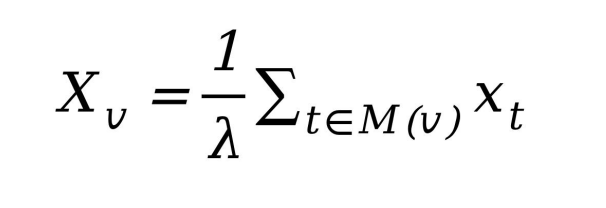

Xv: eigenvector centrality of node v;

M(v): set of neighbors;

λ is adjacency matrix's largest eigenvalue;

Xt represents the centrality of each neighbor v.

In [23]:
# read graphml
G = nx.read_graphml('london_tubenetwork.graphml')

# Calculate eigenvector centrality and add to G attributes
centrality = nx.eigenvector_centrality(G)

nx.set_node_attributes(G, dict(centrality), 'eigenvector')

# Transform to DataFrame and print top 10 nodes of highest eigenvector
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['eigenvector'] = pd.Series(nx.get_node_attributes(G, 'eigenvector'))

df_sorted = df.sort_values(["eigenvector"], ascending=False)
df_sorted[0:10]

station_name  eigenvector
940GZZLUOXC         Oxford Circus     0.399218
940GZZLUGPK            Green Park     0.391885
940GZZLUPCC     Piccadilly Circus     0.310514
940GZZLUBND           Bond Street     0.288661
940GZZLUBST          Baker Street     0.220461
940GZZLUWSM           Westminster     0.220367
940GZZLUTCR  Tottenham Court Road     0.210098
940GZZLULSQ      Leicester Square     0.205882
940GZZLUCHX         Charing Cross     0.179887
940GZZLUWLO              Waterloo     0.179239

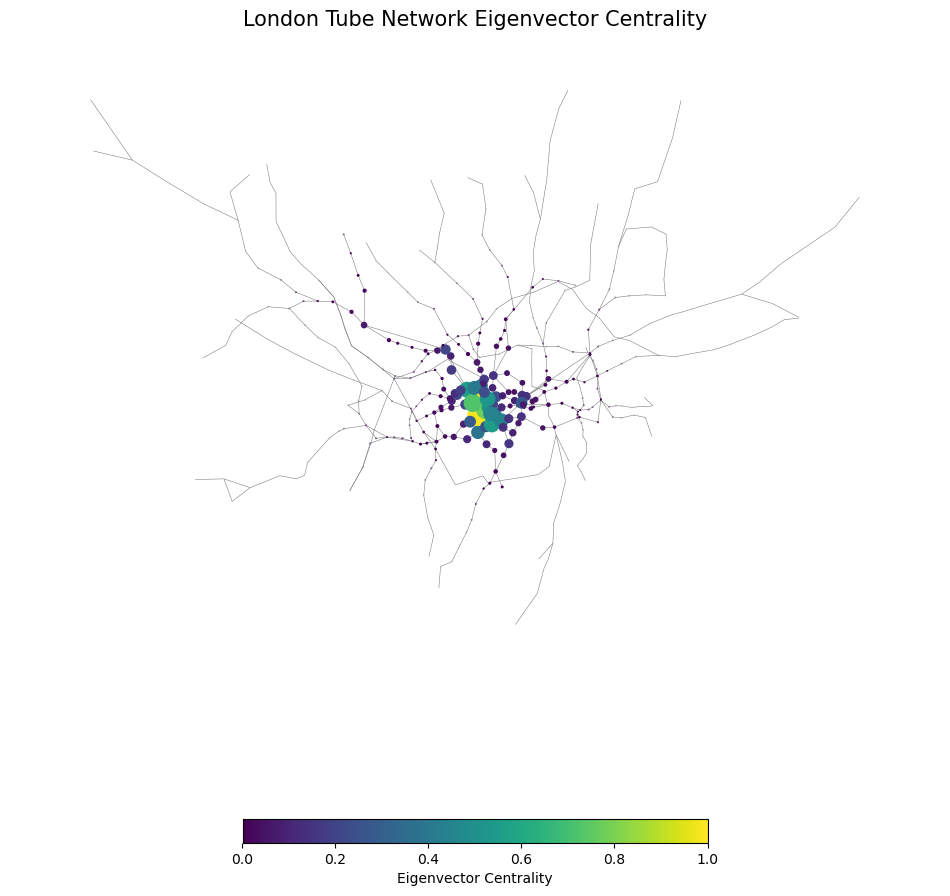

In [24]:
# Draw the map of eigenvector network

# Get the data of eigenvector
centrality_values = [data['eigenvector'] for node, data in G.nodes(data=True)]

# Set node color and size according to eigenvector  
node_color = [data['eigenvector']/max(centrality_values) for node, data in G.nodes(data=True)]
node_size = [data['eigenvector']/max(centrality_values)*200 for node, data in G.nodes(data=True)]

# Draw map
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.4)
nodes = nx.draw_networkx_nodes(G, pos=pos, node_color=node_color, node_size=node_size)

plt.colorbar(nodes, label="Eigenvector Centrality", orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Tube Network Eigenvector Centrality", fontsize=15)
plt.show()


Within the London Undergroun network, stations with high eigenvector centrality, such as King's Cross, St. Pancras and Waterloo, function as major network hubs connected to other key nodes, acting as "super-spreaders." Their high centrality (weighted) underscores their critical role in network flow and vulnerability to disruptions, exemplified by the widespread impact of the 2015 King's Cross fire (BBC 2015).

#### 1.1.1.2 Betweenness Centrality

Betweenness centrality, introduced by Freeman (1977), measures a node's ability to control network flow by calculating its involvement in all shortest paths within the network. The formula is:

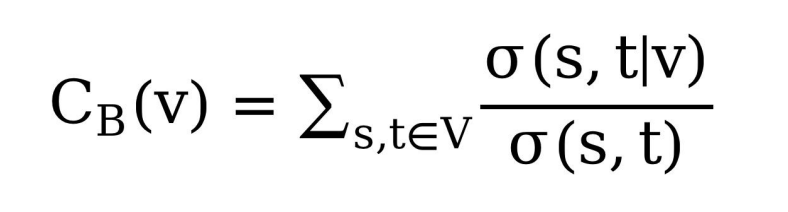

CBv : Betweenness centrality of node v;

V: The set of all nodes in the network;

σ(s, t): Number of shortest paths from node;

σ(s, t|v): Number of shortest paths passing through node v.

In [25]:
#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

station_name  betweenness_t
940GZZLUBST      Baker Street       0.381015
940GZZLUBLG     Bethnal Green       0.353433
940GZZLUFYR     Finchley Road       0.336582
940GZZLUBNK              Bank       0.319563
940GZZLUGPK        Green Park       0.319552
940GZZLUWLO          Waterloo       0.317216
940GZZLULVT  Liverpool Street       0.313026
940GZZLUWSM       Westminster       0.289962
940GZZLUBND       Bond Street       0.258599
910GWHMDSTD    West Hampstead       0.236566

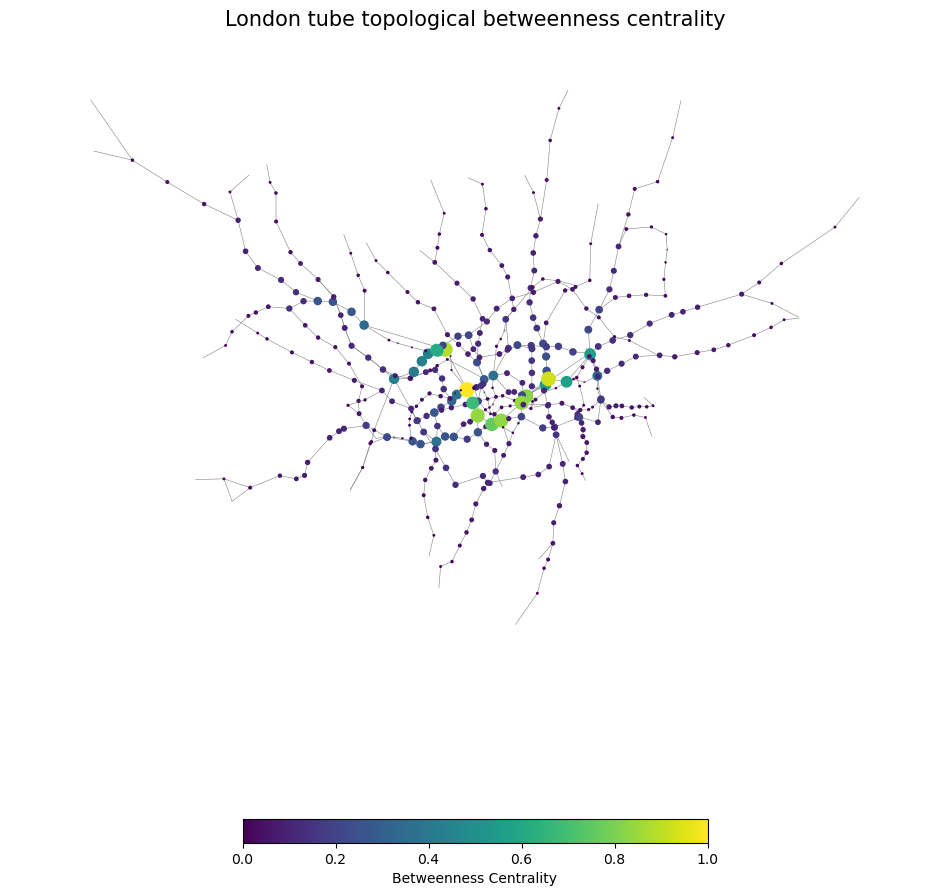

In [26]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

In the London Underground, stations with high betweenness centrality, like Bank/Monument and Stratford (Zhang et al. 2015), are crucial for linking different network sections, evident from their role during the 2012 London Olympics when Stratford managed significantly increased traffic flows (TfL 2012). This underscores the vital role of such nodes in peak traffic management.

#### 1.1.1.3 Closeness Centrality

Closeness centrality, initially introduced by Bavelas (1950) and Sabidussi (1966), quantifies a node's accessibility within a network. It is calculated as the inverse of the average shortest path length from the node to all others in the network:

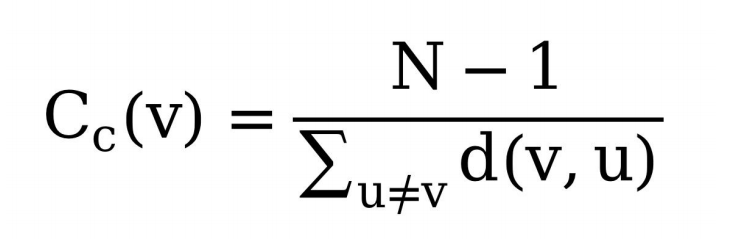

Cc(v): Closeness centrality of node v;
N: total number of nodes;
d(v,u): shortest path distance between nodes v and u.

In [27]:
#topological closeness centrality
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

station_name  closeness_t
940GZZLUGPK        Green Park     0.094897
940GZZLUBND       Bond Street     0.093737
940GZZLUWSM       Westminster     0.093197
940GZZLUBST      Baker Street     0.092900
940GZZLUWLO          Waterloo     0.092389
940GZZLUBNK              Bank     0.092000
940GZZLUOXC     Oxford Circus     0.091614
940GZZLULVT  Liverpool Street     0.090010
940GZZLURGP     Regent's Park     0.089275
940GZZLUFYR     Finchley Road     0.089165

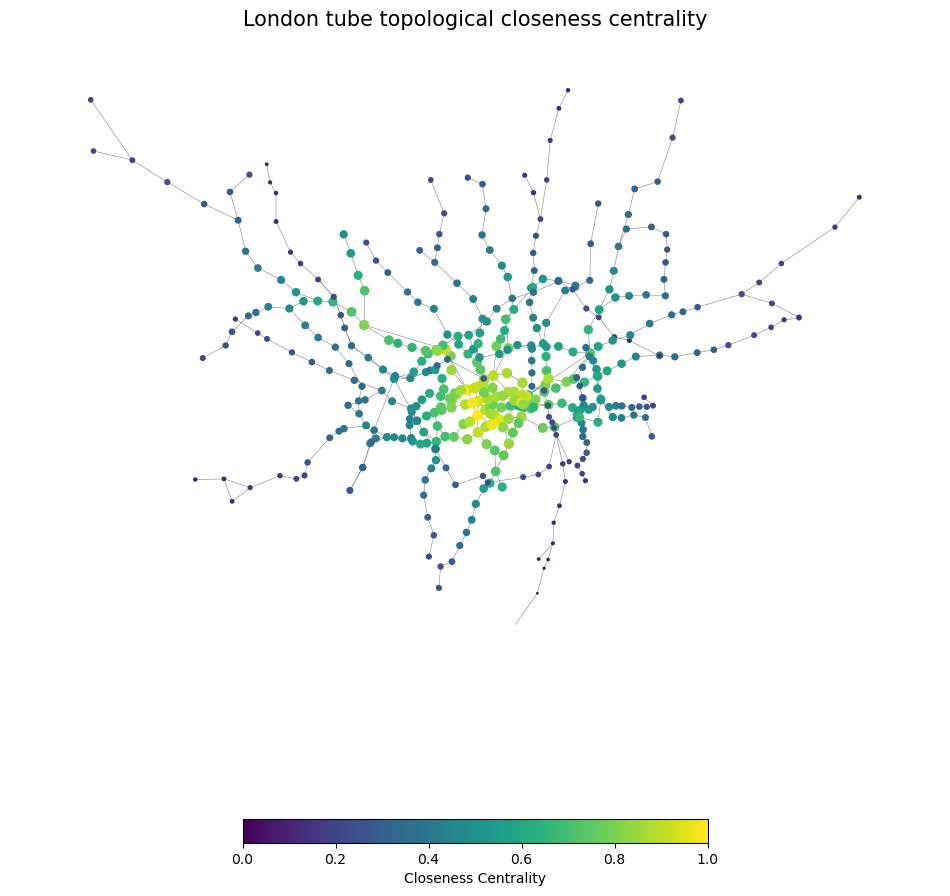

In [28]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

In the London Underground, stations like Oxford Circus and Holborn on the Central Line demonstrate high closeness centrality (weighted), underscoring their strategic importance for efficient communication across the network.

### 1.1.2 Calculate Global Measure

This study employs network efficiency and the average clustering coefficient as global metrics for assessing the resilience of the London Underground network.

Network efficiency addresses the global performance of a network, while the clustering coefficient focuses on local characteristics. These metrics reflect the impact of node removal on network functionality and structure from different perspectives. As general graph-theoretical metrics, both metrics are applicable to various types of complex networks, such as aviation and power networks (Newman 2003).

#### 1.1.2.1 Calculate Network Connectivity (score)

In [29]:
def network_connectivity(G):
    num_components = nx.number_connected_components(G)
    
    connectivity_score = 1 / num_components
    
    return connectivity_score

network_connectivity(G)

1.0

#### 1.1.2.2 Calculate Network Efficiency

Subway networks aim to provide efficient and rapid transit, shortening travel times for passengers. Network efficiency, measuring the average shortest path length between nodes (Latora & Marchiori 2001), captures this capability. The removal of critical stations can significantly increase passenger travel times, with reductions in network efficiency quantitatively reflecting this impact. Thus, changes in network efficiency upon node removal serve as a measure of network resilience. Derrible and Kennedy (2010) demonstrated the utility of this metric in assessing subway network performance.

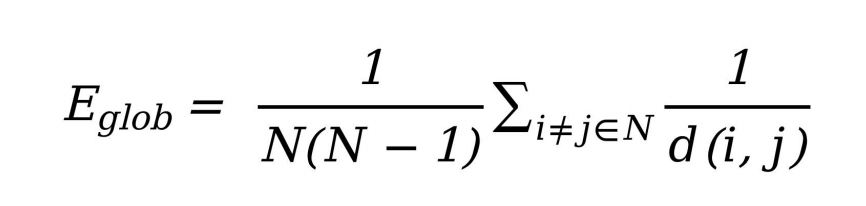

Eglob: Global network efficiency;

N: Total number in network

 d(i, j): length of shortest path between i and .;

In [30]:
# topological network efficiency
def topological_network_efficiency(G):
    n = len(G)
    denom = n * (n - 1)
    
    if denom == 0:
        return 0
    
    shortest_paths = nx.shortest_path_length(G)
    
    sum_inverse = 0
    for source, targets in shortest_paths:
        for target, distance in targets.items():
            if distance > 0:
                sum_inverse += 1 / distance
            
    E = sum_inverse / denom
    
    return E

topological_network_efficiency(G)


0.08135196743399546

#### 1.1.2.3 Calculate Clustering Coefficient

The average clustering coefficient reflects the local redundancy and availability of alternative routes within subway networks. In these networks, the presence of multiple alternative routes between stations enhances fault tolerance through redundant design (Angeloudis & Fisk 2006). The clustering coefficient measures the degree of interconnectedness among nodes; a higher coefficient indicates more alternative connections between stations (Watts & Strogatz 1998). Networks with high clustering coefficients can maintain connectivity through alternative paths when crucial stations are removed, thereby exhibiting greater resilience. This relationship between clustering coefficient and network robustness was supported by De Los Santos et al. (2012), who indicates network could be considered rubust if it still held relative efficient function under failure of certain components, in their analysis of the Madrid subway network. Formula:

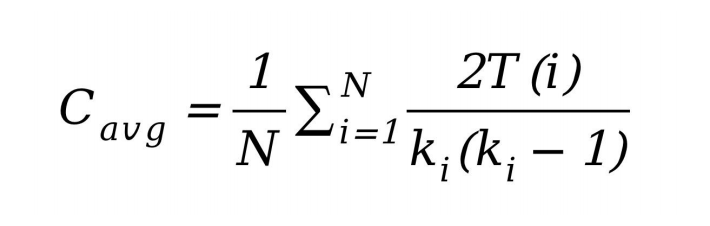

Cavg: Average clustering coefficient;

N: Total number of nodes;

T(i): Number of edges existing in node i and its neighbors;

Ki: Number of neighbors of i.

In [31]:
clus_G = nx.average_clustering(G)
clus_G

0.022602739726027398

### 1.1.3 Node removal

For each of the centrality measures selected in 1.1.1. remove at least 10 nodes following two different strategies. A) Non-sequential removal: using the table created in 1.1.1. remove 1 node at a time following the rank in the table, i.e. from the most important one to the 10th most important one. After each removal, evaluate the impact of the removal using your two measures in 1.1.2 and proceed until you have removed at least 10 nodes. B) Sequential: remove the highest ranked node and evaluate the impact using the 2 measures. After removal, re-compute the centrality measure. Remove the highest ranked node in the new network and evaluate the impact. Continue until removing at least 10 nodes.

In [22]:
# Calculate eigenvector and transform to DF
centrality = nx.eigenvector_centrality(G, max_iter=500, tol=1e-4)

nx.set_node_attributes(G, dict(centrality), 'eigenvector')

df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['eigenvector'] = pd.Series(nx.get_node_attributes(G, 'eigenvector'))

df_sorted = df.sort_values(["eigenvector"], ascending=False)

# Strategy A Non-sequential removal
non_sequential_results = []

G_non_sequential = G.copy()
for i, node in enumerate(df_sorted.index[:10], 1):
    G_non_sequential.remove_node(node)
    efficiency = topological_network_efficiency(G_non_sequential)
    clustering_ceof = nx.average_clustering(G_non_sequential)
    non_sequential_results.append([i, efficiency, clustering_ceof, df_sorted.loc[node, 'station_name'], df_sorted.loc[node, 'eigenvector']])

# Strategy B sequential removal
sequential_results = []

G_sequential = G.copy()
for i in range(1, 11):
    centrality = nx.eigenvector_centrality(G_sequential, max_iter=500, tol=1e-4)
    node_to_remove = max(centrality, key=centrality.get)
    G_sequential.remove_node(node_to_remove)
    efficiency = topological_network_efficiency(G_sequential)
    clustering_ceof = nx.average_clustering(G_sequential)
    sequential_results.append([i, efficiency, clustering_ceof, df.loc[node_to_remove, 'station_name'], centrality[node_to_remove]])

# Write Non-sequential results to CSV
with open('result/eigenvector_non_sequential.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Iteration', 'Network Efficiency', 'Clustering Coefficient', 'Removed Station', 'Eigenvector_Centrality'])
    writer.writerows(non_sequential_results)

# Write sequential results to CSV
with open('result/eigenvector_sequential.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Iteration', 'Network Efficiency', 'Clustering Coefficient', 'Removed Station', 'Eigenvector_Centrality'])
    writer.writerows(sequential_results)

In [23]:
#topological closeness centrality
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)


# Strategy A Non-sequential removal
non_sequential_results = []

G_non_sequential = G.copy()
for i, node in enumerate(df_sorted.index[:10], 1):
    G_non_sequential.remove_node(node)
    efficiency = topological_network_efficiency(G_non_sequential)
    clustering_ceof = nx.average_clustering(G_non_sequential)
    non_sequential_results.append([i, efficiency, clustering_ceof, df_sorted.loc[node, 'station_name'], df_sorted.loc[node, 'closeness_t']])

# Strategy B sequential removal
sequential_results = []

G_sequential = G.copy()
for i in range(1, 11):
    centrality = nx.closeness_centrality(G_sequential)
    node_to_remove = max(centrality, key=centrality.get)
    G_sequential.remove_node(node_to_remove)
    efficiency = topological_network_efficiency(G_sequential)
    clustering_ceof = nx.average_clustering(G_sequential)
    sequential_results.append([i, efficiency, clustering_ceof, df.loc[node_to_remove, 'station_name'], centrality[node_to_remove]])

# Write Non-sequential results to CSV
with open('result/closeness_non_sequential.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Iteration', 'Network Efficiency', 'Clustering Coefficient', 'Removed Station', 'Closeness_Centrality'])
    writer.writerows(non_sequential_results)

# Write sequential results to CSV
with open('result/closeness_sequential.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Iteration', 'Network Efficiency', 'Clustering Coefficient', 'Removed Station', 'Closeness_Centrality'])
    writer.writerows(sequential_results)

In [24]:
#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)


# Strategy A Non-sequential removal
non_sequential_results = []

G_non_sequential = G.copy()
for i, node in enumerate(df_sorted.index[:10], 1):
    G_non_sequential.remove_node(node)
    efficiency = topological_network_efficiency(G_non_sequential)
    clustering_ceof = nx.average_clustering(G_non_sequential)
    non_sequential_results.append([i, efficiency, clustering_ceof, df_sorted.loc[node, 'station_name'], df_sorted.loc[node, 'betweenness_t']])

# Strategy B sequential removal
sequential_results = []

G_sequential = G.copy()
for i in range(1, 11):
    centrality = nx.betweenness_centrality(G_sequential)
    node_to_remove = max(centrality, key=centrality.get)
    G_sequential.remove_node(node_to_remove)
    efficiency = topological_network_efficiency(G_sequential)
    clustering_ceof = nx.average_clustering(G_sequential)
    sequential_results.append([i, efficiency, clustering_ceof, df.loc[node_to_remove, 'station_name'], centrality[node_to_remove]])

# Write Non-sequential results to CSV
with open('result/betweenness_non_sequential.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Iteration', 'Network Efficiency', 'Clustering Coefficient', 'Removed Station', 'Betweenness_Centrality'])
    writer.writerows(non_sequential_results)

# Write sequential results to CSV
with open('result/betweenness_sequential.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Iteration', 'Network Efficiency', 'Clustering Coefficient', 'Removed Station', 'Betweenness_Centrality'])
    writer.writerows(sequential_results)

Ten nodes with the highest value of three chosen centrality were sequentially removed, and the impacts on two global metrics were independently recorded, resulting in 6 figures shown below:

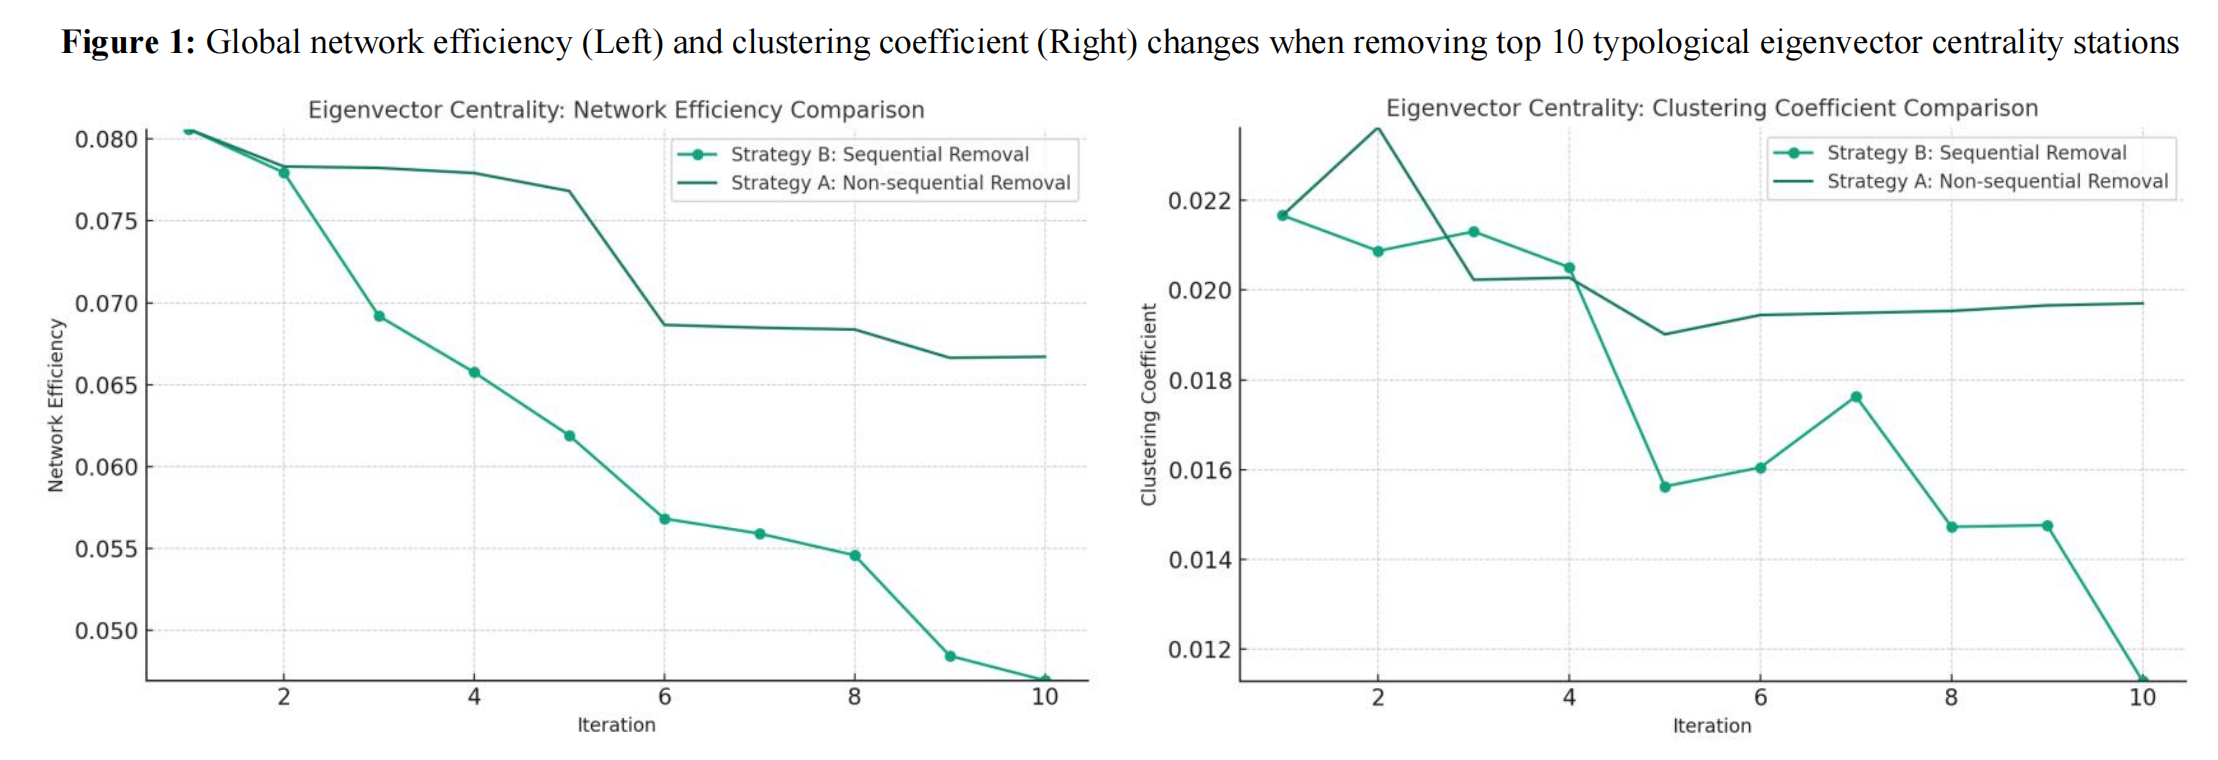

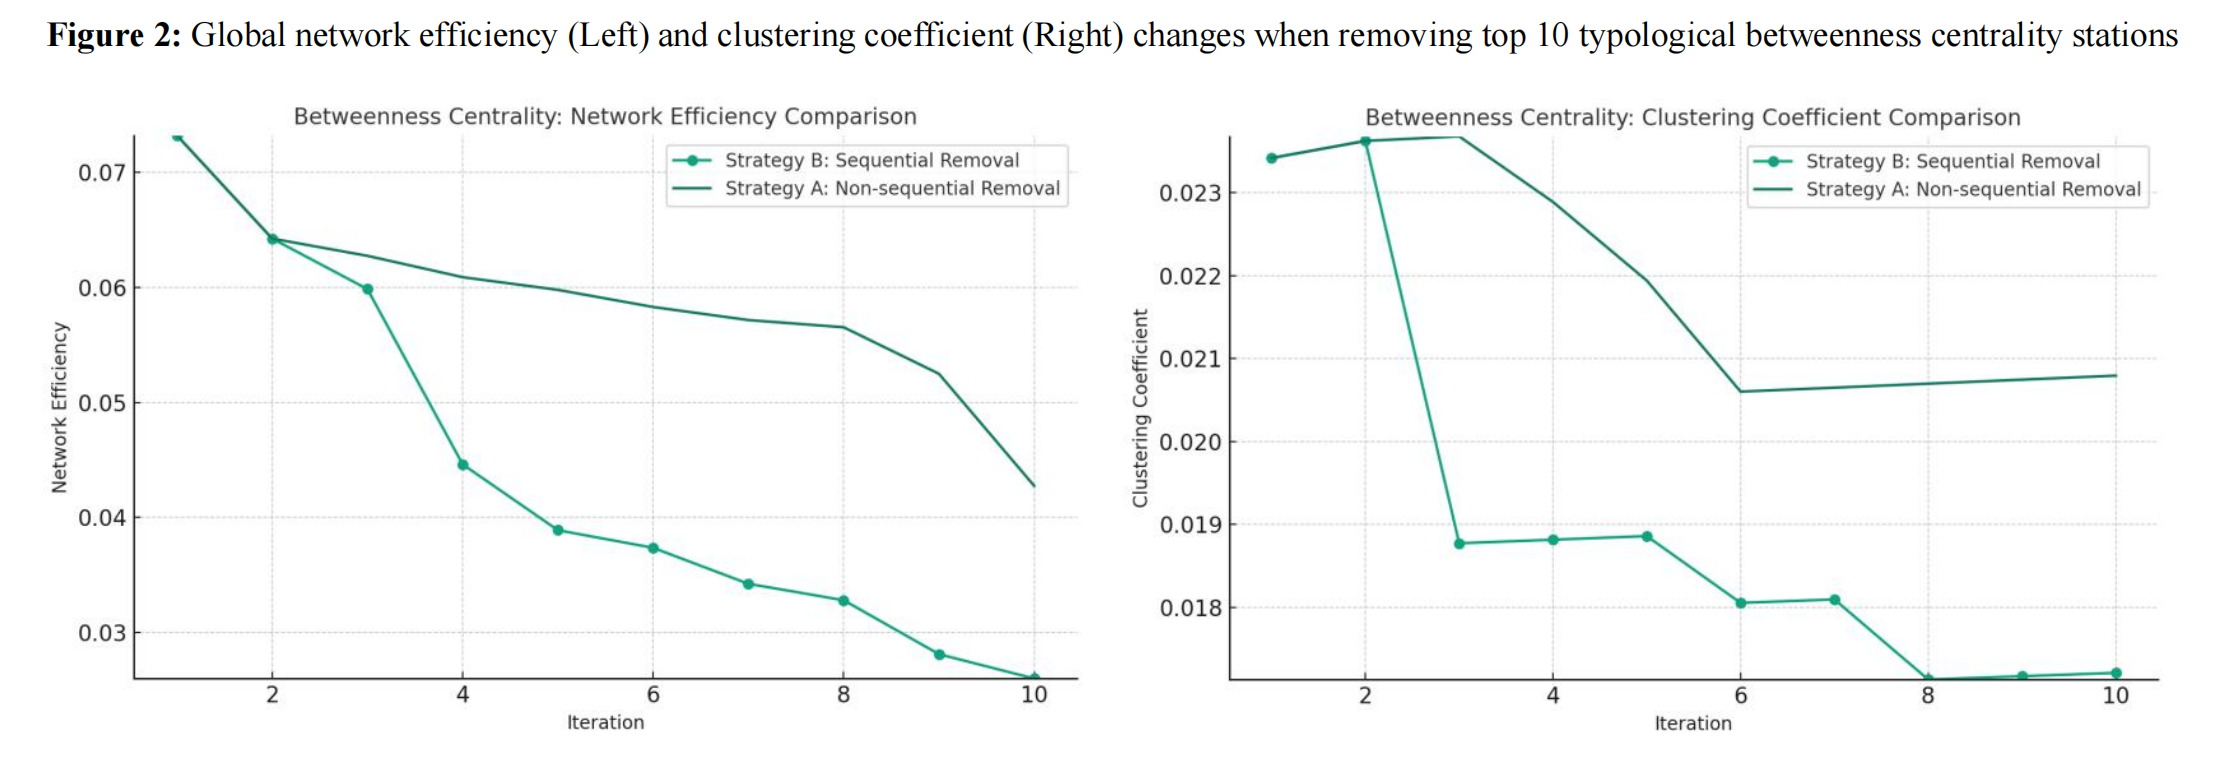

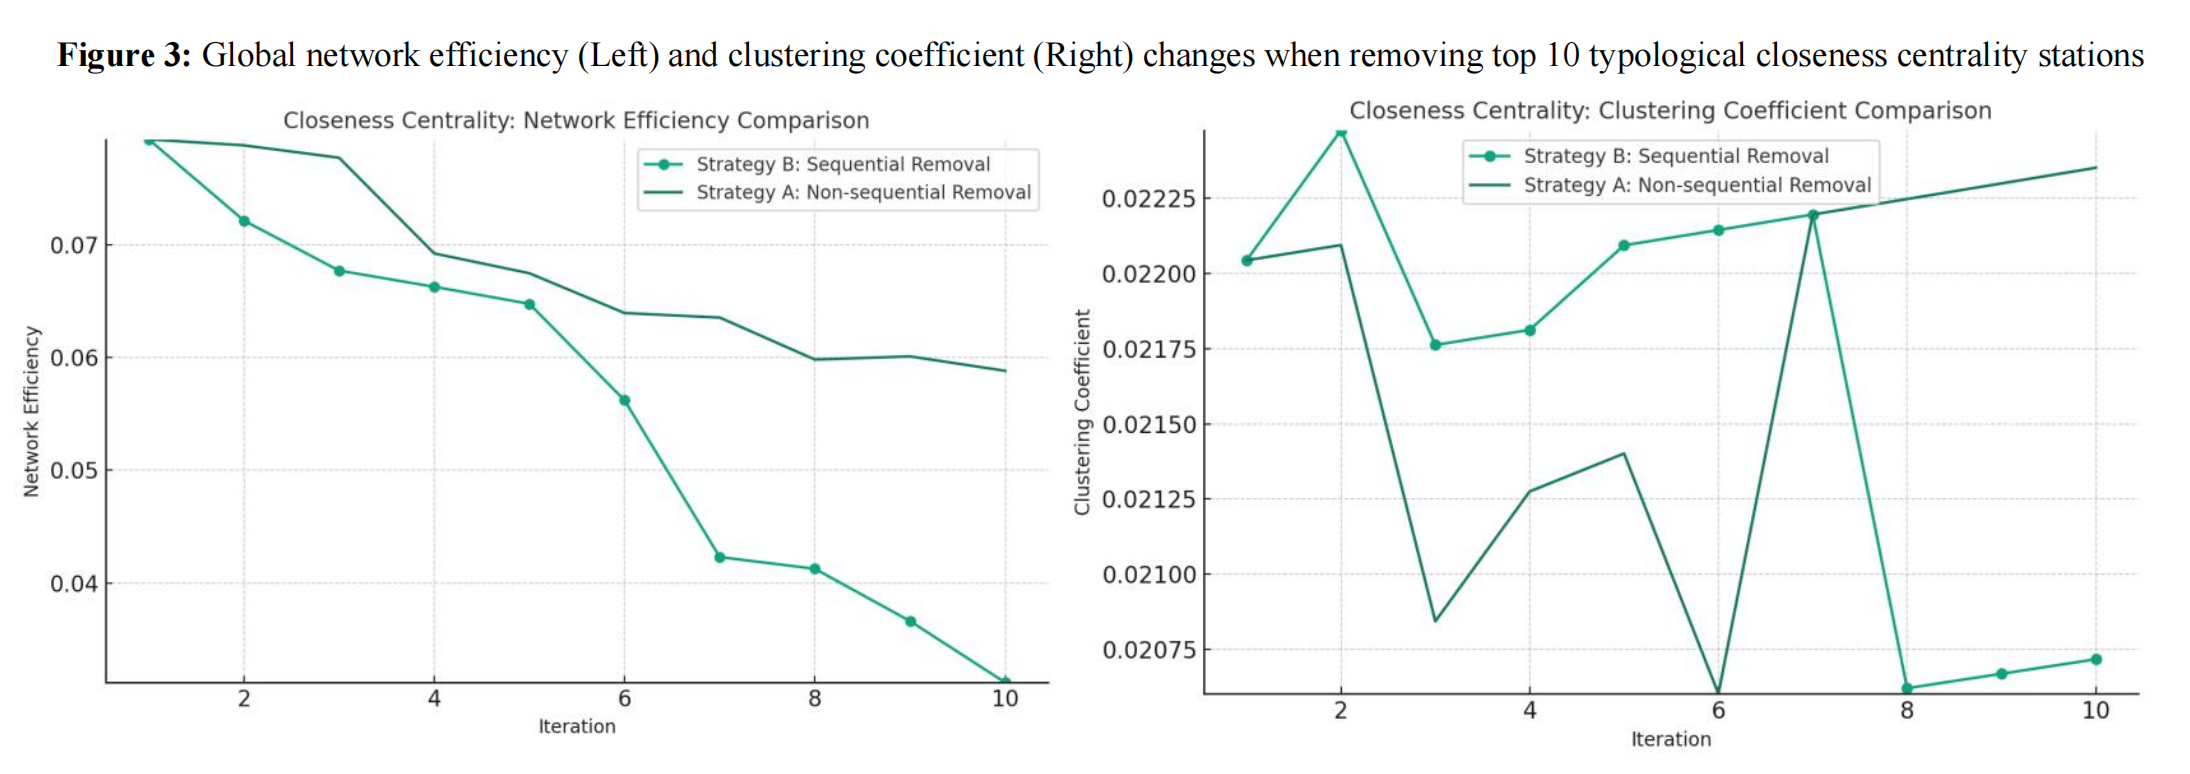

#### 1.1.3.1 Comparison of Global Metrics

In subway networks, the gradual removal of stations inevitably reduces network connectivity, leading to a decline in global performance metrics. The changes in global metrics should exhibit some consistency across different node removal strategies (Jamakovic & Uhlig 2007). However, different metrics may vary in their sensitivity to node removal. Sensitive metrics can capture subtle changes in network structure and functionality when disrupted, providing richer information and making them more suitable for assessment (Latora & Marchiori 2005).

When comparing global metrics, we considered the consistency and sensitivity of metric changes under different node removal strategies. As illustrated, network efficiency showed a generally consistent trend under both sequential and random removal strategies, although there were slight differences in sensitivity to node removal. Both strategies exhibited a synchronous declining trend, indicating that network efficiency is robust across different node removal strategies. In contrast, the clustering coefficient displayed significant inconsistencies between the two strategies.

Considering both consistency and sensitivity of global metrics, network efficiency is more suitable for assessing the resilience of the London Underground network. Network efficiency is not only more sensitive to impacts of node removal, capturing subtle changes in network connectivity, but also shows greater consistency and reliability across different removal strategies.

#### 1.1.3.2 Comparison of Centralities

In assessing the resilience of subway networks using centrality metrics, we conducted a comparative analysis of the three centralities from the perspectives of sensitivity, physical significance, and applicability. Finally, we find the betweenness centrality is more suitble for measuring resilience.

Regarding sensitivity, we measured the cumulative decrease in network efficiency (Table 1) and found that node removal based on betweenness centrality had the most pronounced impact on network efficiency, by comparing the overall cumulative decrease of sequential and non-sequential removal. In contrast, node removals based on eigenvector centrality and closeness centrality had a relatively smaller impact on network efficiency.

Table 1: Cumulative decrease of network efficiency of the 3 centrality with 2 strategies

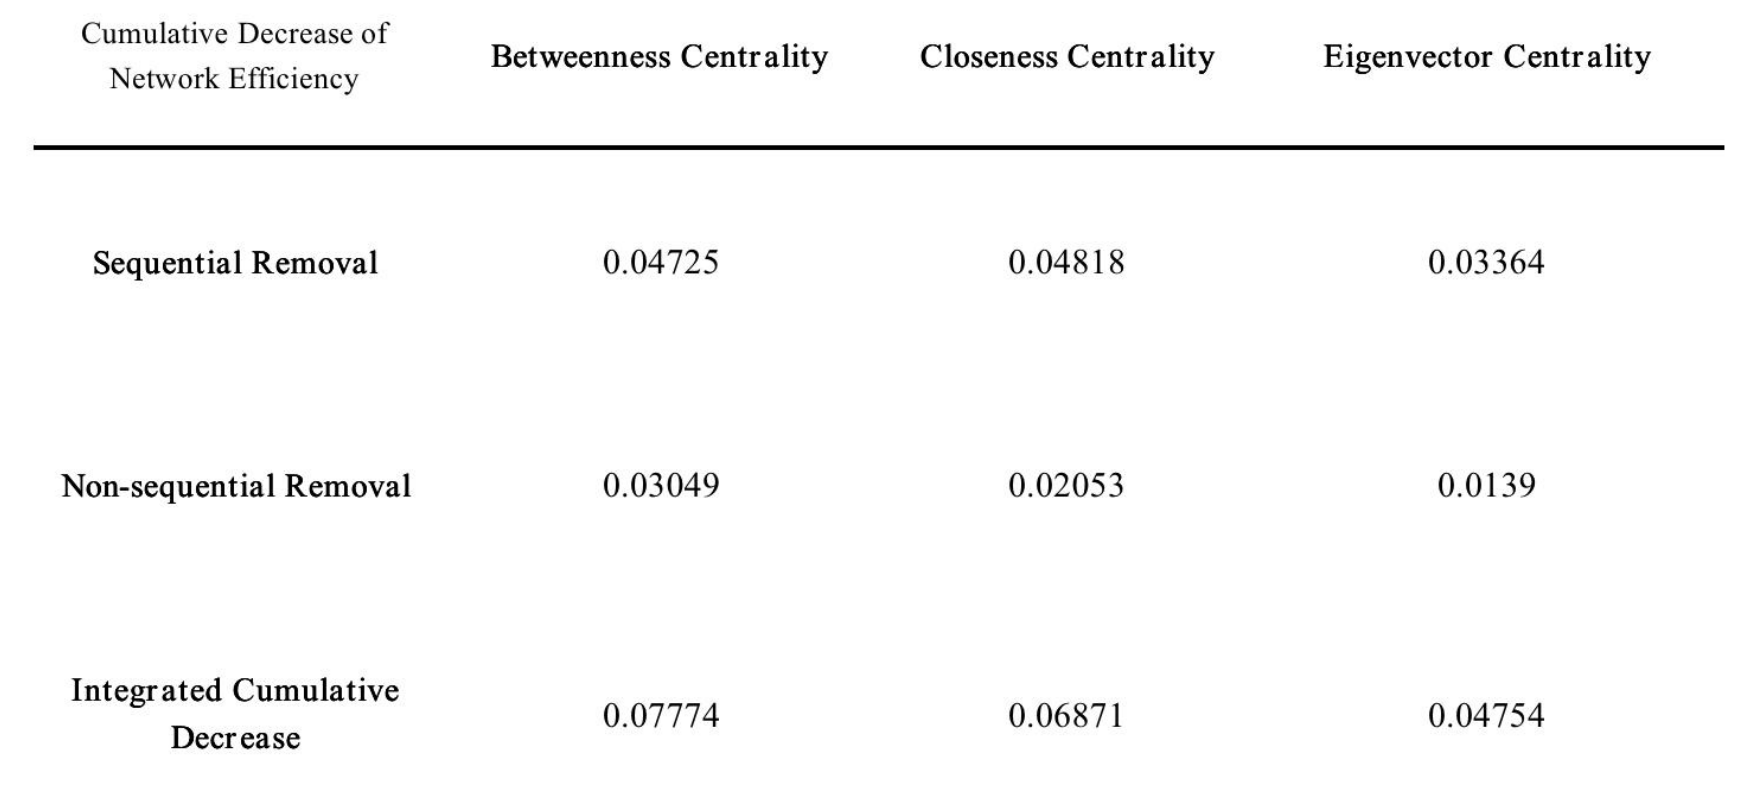

Physically, betweenness centrality measures a node's role as an "intermediary" within a network, specifically its capacity to control communication between other nodes (Freeman 1977). In subway networks, resilience refers to the network's ability to maintain essential functions and connectivity in the face of disruptions or failures (Mattsson & Jenelius 2015; De Los Santos et al., 2012). Stations with high betweenness centrality are often pivotal transfer hubs that link different lines, playing a crucial role in ensuring efficient passenger transit. These hubs are typically located on the shortest paths between many routes; their impairment can lead to significant disruptions in line connectivity, considerably reducing network accessibility and efficiency, thus directly impacting network resilience. In contrast, eigenvector centrality and closeness centrality emphasize a node's local influence or accessibility but do not impact overall network resilience as directly and significantly as betweenness centrality.

In terms of applicability, betweenness centrality has been widely used in studies on the resilience and vulnerability of subway networks. Research by Zhang et al. (2015) demonstrates that betweenness centrality effectively identifies structural weaknesses in subway networks, providing insights for network optimization. In contrast, eigenvector centrality and closeness centrality have been less frequently applied in this field.

#### 1.1.3.3 Removal Strategy Comparison

The graph illustrates a marked stepwise decline in network efficiency upon sequential removal of nodes with high betweenness centrality.This indicates that the removal of these high-centrality nodes leads to periodic degradation in network performance (Holme et al. 2002). In contrast, the efficiency decline under a non-sequential removal strategy is more gradual, without significant stepwise changes.

A sequential removal strategy is preferable for assessing subway network resilience as it effectively identifies critical nodes impacting network efficiency and simulates extreme scenarios where the most harmful nodes are targeted (Albert et al. 2000), providing a resilience "lower bound." This strategy also helps determine the network's "robustness threshold"—the limit of critical node loss before total failure (Cohen et al. 2000). The rapid efficiency reduction after removing the first four nodes suggests a specific robustness threshold for the London Underground, essential for resilience strategy formulation.

Overall, a sequential removal strategy based on betweenness centrality offers a more accurate assessment of subway network resilience.

## 1.2 Weighted Network (Flows)

In this section, we will include passengers into the underground, and assess whether different 
measures need to be used when flows are considered. The network to use in this section is the
weighted network given to you in the coursework, where the flows of passengers were assigned to th 
links between stations.

In [32]:
# Read CSV and graphml, construct directed network
# The CSV contains features of flows, direction, jobs, population.
flows_df = pd.read_csv('london_flows.csv')

G = nx.DiGraph(nx.read_graphml('london_tubenetwork.graphml'))

# we can also add the stations name to the edge attributes from the nodes attributes:
nod_name1={(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2={(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G,nod_name1,'station_1_')
nx.set_edge_attributes(G,nod_name2,'station_2_')

# To check edges attributes:
list(G.edges(data = True))[0]

('910GCAMHTH',
 '910GBTHNLGR',
 {'length': 1076.0822006959384,
  'name': 'London Overground',
  'line_id': 'LeaValleyLine1',
  'station_1_': 'Cambridge Heath',
  'station_2_': 'Bethnal Green'})

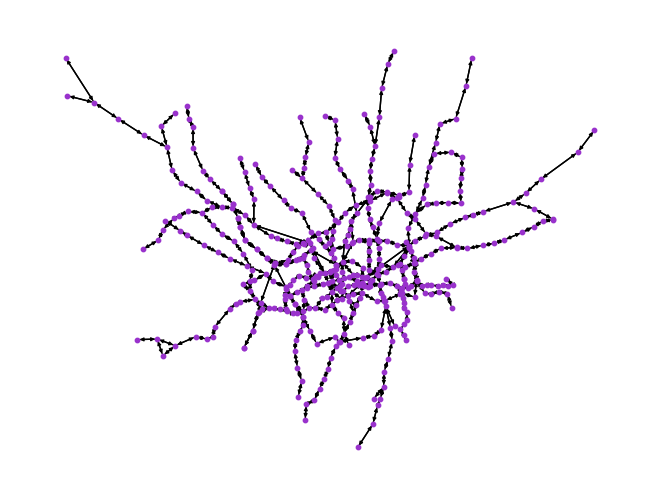

In [33]:
nx.draw(G,
        pos,
        with_labels = False,
        node_color='darkorchid',
        node_size=10,

       arrowsize=5)

In [34]:
# Add features to corresponding edges
for _, row in flows_df.iterrows():
    origin, dest, flows, population, jobs, distance = row
    
    # Find matched edges in directed network
    matched_edges = [(e1, e2) for e1, e2 in G.edges() 
                     if (G[e1][e2].get('station_1_', '') == origin and G[e1][e2].get('station_2_', '') == dest)]
    
    # add features to matched edges
    for e1, e2 in matched_edges:
        G[e1][e2]['flows'] = flows
        G[e1][e2]['population'] = population
        G[e1][e2]['jobs'] = jobs
        G[e1][e2]['distance'] = distance

In [35]:
# Check the edge features
list(G.edges(data = True))[0:3]

[('910GCAMHTH',
  '910GBTHNLGR',
  {'length': 1076.0822006959384,
   'name': 'London Overground',
   'line_id': 'LeaValleyLine1',
   'station_1_': 'Cambridge Heath',
   'station_2_': 'Bethnal Green',
   'flows': 1,
   'population': 328,
   'jobs': 4660,
   'distance': 831.8715882461433}),
 ('910GCAMHTH',
  '910GLONFLDS',
  {'length': 970.949720005337,
   'name': 'London Overground',
   'line_id': 'LeaValleyLine2',
   'station_1_': 'Cambridge Heath',
   'station_2_': 'London Fields',
   'flows': 0,
   'population': 328,
   'jobs': 790,
   'distance': 979.4169859708212}),
 ('910GBTHNLGR',
  '910GCAMHTH',
  {'length': 1076.0822006959384,
   'name': 'London Overground',
   'line_id': 'LeaValleyLine1',
   'station_1_': 'Bethnal Green',
   'station_2_': 'Cambridge Heath',
   'flows': 0,
   'population': 6798,
   'jobs': 458,
   'distance': 831.8715882461433})]

In [36]:
G.get_edge_data('910GBTHNLGR', '910GCAMHTH')

{'length': 1076.0822006959384,
 'name': 'London Overground',
 'line_id': 'LeaValleyLine1',
 'station_1_': 'Bethnal Green',
 'station_2_': 'Cambridge Heath',
 'flows': 0,
 'population': 6798,
 'jobs': 458,
 'distance': 831.8715882461433}

In [37]:
G.get_edge_data('910GCAMHTH', '910GBTHNLGR')

{'length': 1076.0822006959384,
 'name': 'London Overground',
 'line_id': 'LeaValleyLine1',
 'station_1_': 'Cambridge Heath',
 'station_2_': 'Bethnal Green',
 'flows': 1,
 'population': 328,
 'jobs': 4660,
 'distance': 831.8715882461433}

### 1.2.1 Weighted Betweenness Centrality in Directed Networks

In this section, we adept the calculation of betweenness centrality for weighted directed networks by integrating directionality and traffic volume. Specifically, passenger flows between stations are used as edge weights, where higher flows at busier stations indicate greater importance. This modification improves the accuracy of betweenness centrality, making it more applicable to networks where the direction and magnitude of flows are essential for assessing node significance.

We converted the original undirected, unweighted network into a directed, weighted one, assigning traffic volumes as weights to the edges using data from CSV files. We then applied Brandes' (2001) formula for betweenness centrality that incorporates both direction and weight.

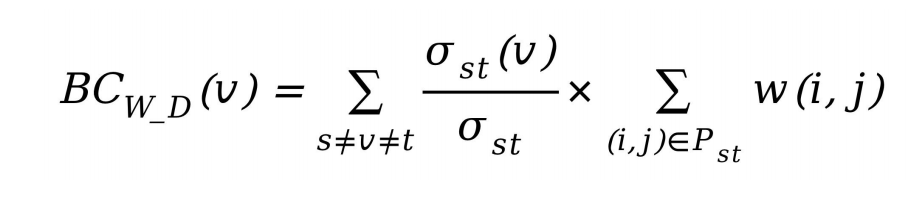

Ost(v): Number of shortest paths from node s to t which through node v;

Ost: Number of shortest paths from node s to t ;

w(i,j): Wight of egde (i,j), flows.

In [38]:
### Weighted betweenness centrality:
#Let us compute the betweenness centrality for the network, considering the distance between stations:

bet_london_w=nx.betweenness_centrality(G,weight='flows')

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

In [40]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

station_name  betweenness_w
940GZZLUBNK               Bank       0.418253
940GZZLUBST       Baker Street       0.343977
940GZZLUHBN            Holborn       0.325176
940GZZLUCHL      Chancery Lane       0.313050
940GZZLUSPU         St. Paul's       0.312661
940GZZLUBLG      Bethnal Green       0.283176
940GZZLULSQ   Leicester Square       0.279360
910GBTHNLGR      Bethnal Green       0.278385
940GZZLUPCC  Piccadilly Circus       0.265648
940GZZLUOXC      Oxford Circus       0.263452

After recalculating betweenness centrality with direction and weight considerations, we identified the top ten nodes (Table). Comparisons with earlier results (Table) show shifts in key node rankings, indicating that including network directionality and weight offers a more comprehensive and accurate evaluation of node importance (Cats & Jenelius 2014).

###  1.2.2 Weighted Directed Network Efficiency

To assess the impact of node removal, where passenger flows indicate station importance, we refined our method to compute network efficiency, now calculating it for a directed, weighted network (Latora & Marchiori 2001). The adjusted calculation formula:

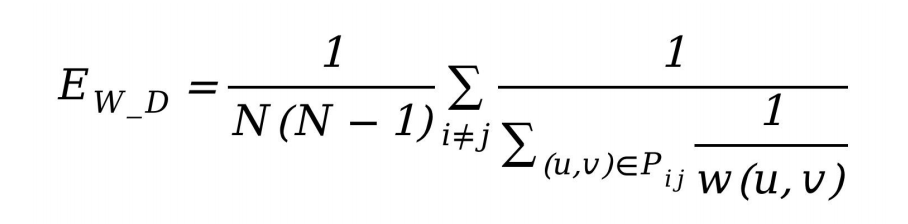

N: Number of nodes;

Pij: Shortest path with direction and weight from node i to j;

w(u, v): weight of edge (u, v), flows.

In [41]:
# weighted network efficiency
def directed_weighted_network_efficiency(G, weight='weight'):
    # Get num of nodes
    N = G.number_of_nodes()
    
    # Calculate the sum of the weights of all edges in the network
    total_weight = sum(attr.get(weight, 0) for _, _, attr in G.edges(data=True))
    
    # Initialising efficiency values
    efficiency = 0
    
    # Iterate over all node pairs
    for node_i in G.nodes():
        for node_j in G.nodes():
            if node_i != node_j:
                try:
                    # Get the shortest path from node i to node j
                    shortest_path_ij = nx.shortest_path(G, source=node_i, target=node_j, weight=weight)
                    # Calculate the sum of the edge weights on the shortest paths
                    path_weight_ij = sum(G[u][v].get(weight, 0) for u, v in zip(shortest_path_ij, shortest_path_ij[1:]))
                except nx.NetworkXNoPath:
                    path_weight_ij = 0
                
                try:
                    # Get the shortest path from node j to node i
                    shortest_path_ji = nx.shortest_path(G, source=node_j, target=node_i, weight=weight)
                    # Calculate the sum of the edge weights on the shortest paths
                    path_weight_ji = sum(G[u][v].get(weight, 0) for u, v in zip(shortest_path_ji, shortest_path_ji[1:]))
                except nx.NetworkXNoPath:
                    path_weight_ji = 0
                
                # Efficiency value of cumulative node pairs
                if path_weight_ij != 0 or path_weight_ji != 0:
                    efficiency += 0.5 * ((path_weight_ij / total_weight) + (path_weight_ji / total_weight))
    
    # Calculation of average efficiency
    efficiency /= N * (N - 1)
    
    return efficiency

directed_weighted_network_efficiency(G, weight='flows')

0.01076549671451823

The adjusted method incorporates the effects of passenger traffic inflows and outflows at stations. Removal of high-flow nodes significantly reduces global efficiency, while removal of lower-flow nodes that lengthen shortest paths might increase it. This approach more accurately reflects changes in the London Underground's efficiency and its true resilience compared to traditional topological metrics. The calculated new network efficiency is 0.01077.

### 1.2.3 Node removal (Weighted Directed Network)

Use adjusted methods, calculate weighted directed network betweenness centrality.

In [114]:
#Let us compute the betweenness centrality for the network, considering the distance between stations:
bet_london_w=nx.betweenness_centrality(G,weight='flows')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

# Strategy A Non-sequential removal
sequential_results = []

G_sequential = G.copy()
for i in range(1, 4):
    centrality = nx.betweenness_centrality(G_sequential,weight='flows')
    node_to_remove = max(centrality, key=centrality.get)
    G_sequential.remove_node(node_to_remove)
    efficiency = topological_network_efficiency(G_sequential)
    sequential_results.append([i, efficiency, df.loc[node_to_remove, 'station_name'], centrality[node_to_remove]])

# Strategy B sequential removal
with open('result/topological_efficiency_betweenness_sequential.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Iteration', 'topological_network_efficiency', 'Removed Station', 'Betweenness_Centrality_w'])
    writer.writerows(sequential_results)

0.08135196743399546

Use previous method, calculate typological network betweenness centrality.

In [113]:
# Strategy A Non-sequential removal
sequential_results = []

G_sequential = G.copy()

for i in range(1, 4):
    centrality = nx.betweenness_centrality(G_sequential,weight='flows')
    node_to_remove = max(centrality, key=centrality.get)
    G_sequential.remove_node(node_to_remove)
    efficiency = directed_weighted_network_efficiency(G_sequential, weight='flows')
    sequential_results.append([i, efficiency, df.loc[node_to_remove, 'station_name'], centrality[node_to_remove]])

# Strategy B sequential removal
with open('result/DW_efficiency_betweenness_sequential.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Iteration', 'directed_weighted_network_efficiency', 'Removed Station', 'Betweenness_Centrality_w'])
    writer.writerows(sequential_results)

0.01076549671451823

Based on the argument of Section 1.3, we employ a sequential removal strategy Table 5: The top 10 important stations by weighted betweenness centrality targeting the three stations with the highest weighted betweenness centrality (Table 2). Comparing changes in topological network efficiency and directed weighted network efficiency (Figure 4; Table 2) reveals that Bethnal Green exerts the most significant impact on the London subway network.

Table 2: Global network efficiency changes when removing top 3 weighted betweenness centrality stations (Table)

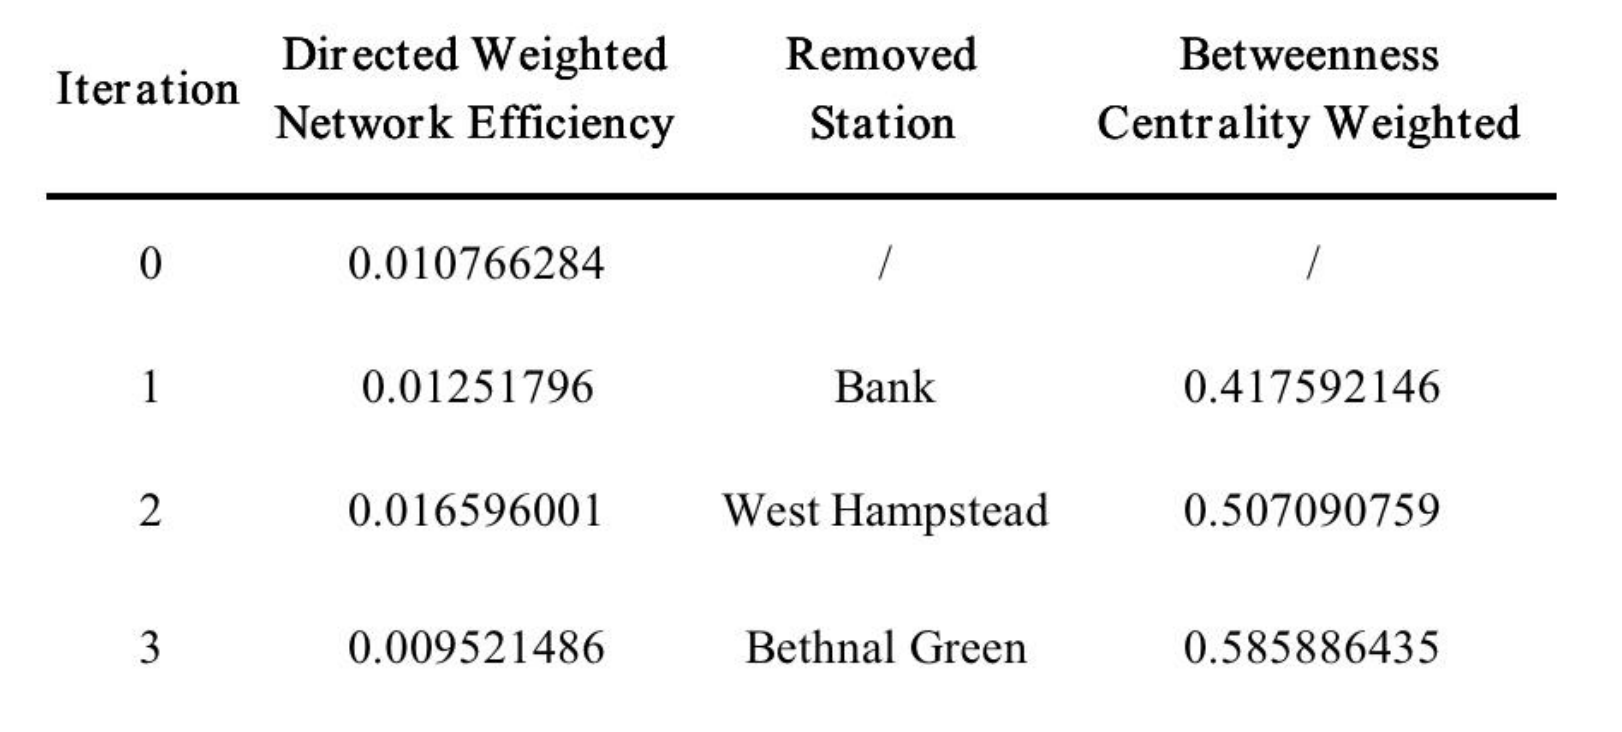

Figure 4: Global network efficiency changes when removing top 3 weighted betweenness centrality stations (Plot)

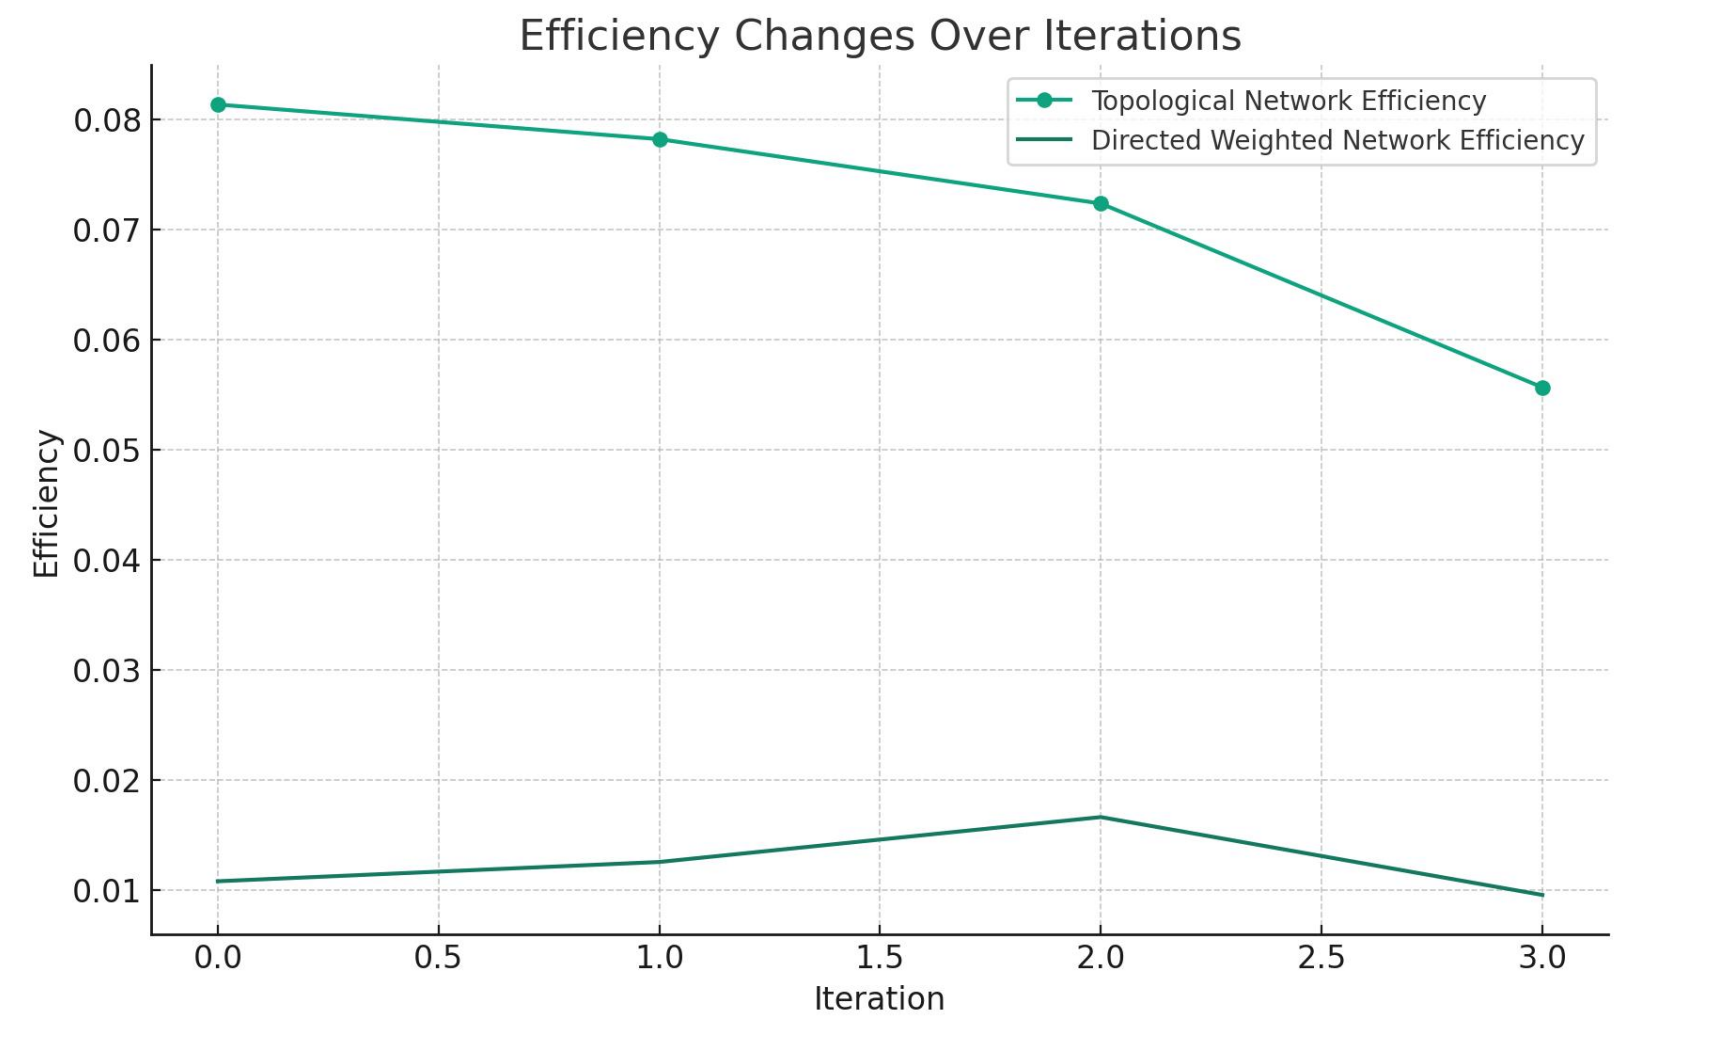

Table 3: Global network efficiency changes when removing top 3 typological betweenness centrality stations (Table)

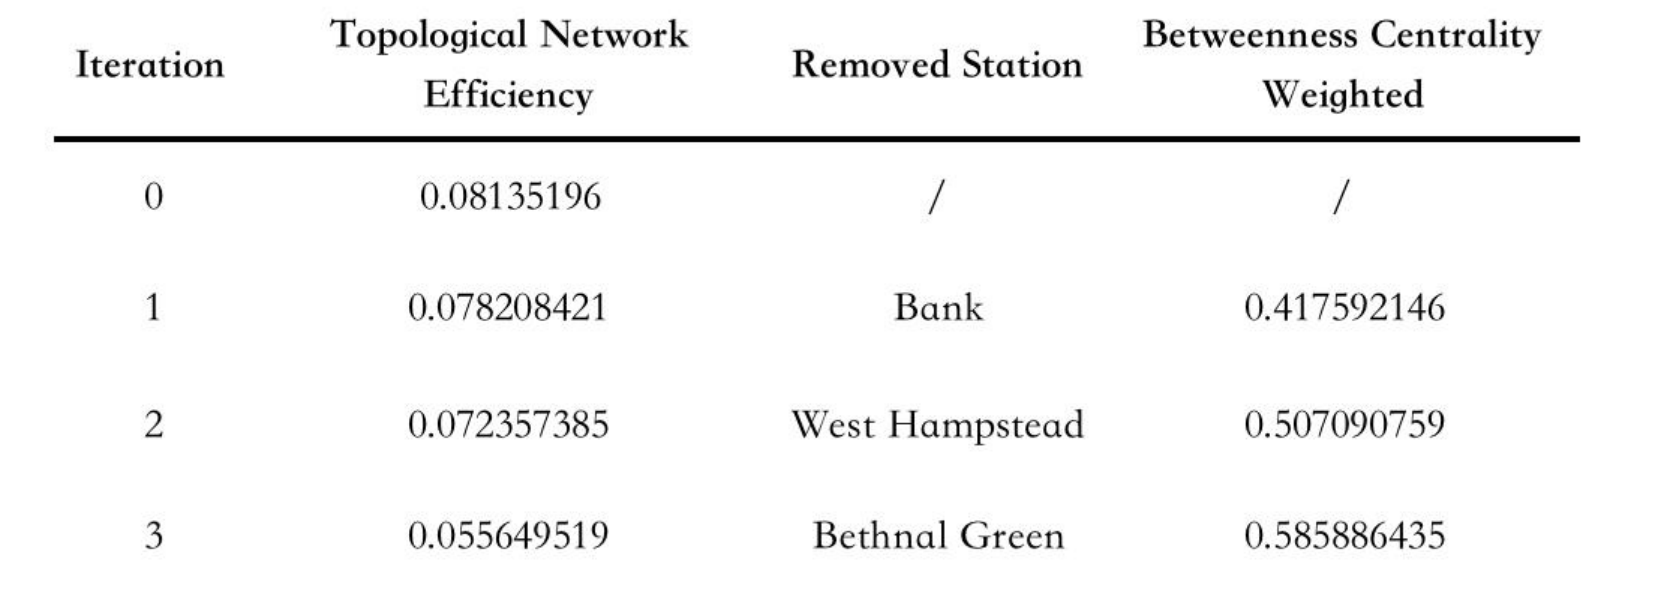

In the London Underground network, directed weighted network efficiency fluctuates with node removal, while unweighted network efficiency consistently declines. This can be explained by considering both network structure and passenger flow distribution.

As stations are removed, the length of shortest paths increases, leading to a reduction in topological network efficiency (Figure 2 left; Table 7). This decline reflects decreased network connectivity while excludes passenger flow considerations. However, the directed weighted network efficiency initially increases with removing, possibly because the removed stations, although frequently part of shortest paths, carry relatively low fows. Removing these stations optimizes the network structure, enhancing overall efficiency.

Both efficiency measures significantly decrease after removing Bethnal Green, a station critical both in terms of shortest path involvement and high flows. This underscores Bethnal Green's role as a key node, whose removal significantly impacts London subway network flows.

# Part 2: Spatial Interaction Models

## 2.1 Models and Calibration

### 2.1.1 Introduce Double-Constrained Model

In [65]:
#import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import scipy.stats
import numpy as np
from math import sqrt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [66]:
#set up the metric calculations
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [67]:
#read in the cdatasub from the first week
cdatasub = pd.read_csv("london_flows.csv")

cdatasub.head(10)

station_origin station_destination  flows  population   jobs     distance
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097
1     Abbey Road             Beckton      1         599    442  8510.121774
2     Abbey Road           Blackwall      3         599    665  3775.448872
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220
4     Abbey Road        Canning Town     37         599  15428  2228.923167
5     Abbey Road        Crossharbour      1         599   1208  6686.475560
6     Abbey Road        Custom House      0         599    845  3824.855630
7     Abbey Road          Cutty Sark      2         599   1748  8503.898909
8     Abbey Road              Cyprus      7         599    850  6532.099618
9     Abbey Road         Devons Road      1         599    611  3958.324171

In [68]:
#show the actual flows between boroughs
cdatasubmat = pd.pivot_table(cdatasub, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
#show the data
cdatasubmat

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN      3.0   
Aldgate                     NaN            NaN         0.0      NaN   
Aldgate East                NaN            NaN         2.0      0.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         2.0      5.0   
Woodgrange Park             NaN            0.0         NaN      NaN   
Woodside Park               NaN            NaN         1.0     26.0   
Woolwich Arsenal           20.0            NaN         NaN      NaN   
All                       345.0          750.0      2202.0   7782.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                   17.0         NaN      35.0       0.0      NaN   
Aldgate                       0.0         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       0.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                     47.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                11.0         NaN       0.0       NaN      NaN   
Woolwich Arsenal              NaN         7.0       NaN       NaN      NaN   
All                        7932.0       444.0     741.0     256.0    173.0   

station_destination   Angel  ...  Wimbledon  Wimbledon Park  Wood Green  \
station_origin               ...                                          
Abbey Road              NaN  ...        NaN             NaN         NaN   
Acton Central           NaN  ...        NaN             NaN         NaN   
Acton Town             11.0  ...       77.0             3.0         6.0   
Aldgate                17.0  ...        0.0             NaN         4.0   
Aldgate East           20.0  ...       24.0             0.0         0.0   
...                     ...  ...        ...             ...         ...   
Woodford               22.0  ...        2.0             NaN         1.0   
Woodgrange Park         NaN  ...        NaN             NaN         NaN   
Woodside Park          59.0  ...        0.0             NaN         0.0   
Woolwich Arsenal        NaN  ...        NaN             NaN         NaN   
All                  8103.0  ...     6295.0           596.0      2146.0   

station_destination  Wood Lane  Wood Street  Woodford  Woodgrange Park  \
station_origin                                                           
Abbey Road                 NaN          NaN       NaN              NaN   
Acton Central              NaN          NaN       NaN              0.0   
Acton Town                 9.0          NaN       0.0              NaN   
Aldgate                    8.0          NaN       0.0              NaN   
Aldgate East              12.0          NaN       1.0              NaN   
...                        ...          ...       ...              ...   
Woodford                   NaN          NaN       NaN              NaN   
Woodgrange Park            NaN          NaN       NaN              NaN   
Woodside Park              NaN          NaN       NaN              NaN   
Woolwich Arsenal           NaN          NaN       NaN              NaN   
All                     1578.0        404.0     706.0            242.0   

station_destination  Woodside Park  Woolwich Arsenal      All  
station_origin                                            

### 2.1.2 Build Double-Constrained Model

The double-constrained gravity model, considering origin and destination attributes, more accurately delineates flow distribution than single-constrained model. Our dataset, with origin population, destination jobs, flow data, and inter-station distances, offering robust data support for building such model.

In [69]:
#take the variables and produce logarithms of them
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    cdatasub[f"log_{x}"] = np.log(cdatasub[x] + 0.0001)
    log_x_vars.append(f"log_{x}")

cdatasub.head(10)

station_origin station_destination  flows  population   jobs     distance  \
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097   
1     Abbey Road             Beckton      1         599    442  8510.121774   
2     Abbey Road           Blackwall      3         599    665  3775.448872   
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220   
4     Abbey Road        Canning Town     37         599  15428  2228.923167   
5     Abbey Road        Crossharbour      1         599   1208  6686.475560   
6     Abbey Road        Custom House      0         599    845  3824.855630   
7     Abbey Road          Cutty Sark      2         599   1748  8503.898909   
8     Abbey Road              Cyprus      7         599    850  6532.099618   
9     Abbey Road         Devons Road      1         599    611  3958.324171   

   log_population   log_jobs  log_distance  
0        6.395262  11.271478      9.003504  
1        6.395262   6.091310      9.049012  
2        6.395262   6.499787      8.236275  
3        6.395262  10.981421      8.534348  
4        6.395262   9.643939      7.709274  
5        6.395262   7.096721      8.807842  
6        6.395262   6.739337      8.249276  
7        6.395262   7.466228      9.048280  
8        6.395262   6.745236      8.784484  
9        6.395262   6.415097      8.283576

In [70]:
cdatasub["station_origin"] = cdatasub["station_origin"].astype('category')
cdatasub["station_destination"] = cdatasub["station_destination"].astype('category')

print(cdatasub[["station_origin", "station_destination"]].dtypes)

station_origin         category
station_destination    category
dtype: object


In [ ]:
#create the formula (the "-1" indicates no intercept in the regression model).
dbl_form = 'flows ~ station_origin + station_destination + distance -1'
#run a doubly constrained sim
doubSim = smf.glm(formula = dbl_form, data=cdatasub, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(doubSim.summary())

# the coefficient of distance--beta is -0.00015184728753333897

In [ ]:
#get the estimates
cdatasub["doubsimfitted"] = np.round(doubSim.mu)
#here's the matrix
cdatasubmat = cdatasub.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
cdatasubmat

In [ ]:
# R2
CalcRSqaured(cdatasub["flows"],cdatasub["doubsimfitted"])
# R2 is 0.476632

In [ ]:
# RMSE
CalcRMSE(cdatasub["flows"],cdatasub["doubsimfitted"])
# 95.196

In the London Underground context, the impact of distance decay is considered minimal for two reasons: (1) Subway fares are typically zoned, so increases in distance do not proportionately raise travel costs; (2) The subway's efficiency ensures that additional distances between stations have limited impact on travel time. Consequently, passengers are unlikely to change their travel preferences due to increased distances. Thus, we hypothesize that the parameter β follows a negative exponential function, reflecting a milder impact of distance compared to a negative 
power law function.

In [71]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(cdatasub.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
cdatasub = cdatasub.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(cdatasub.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
cdatasub = cdatasub.merge(D_j, on = "station_destination", how = "left" )

In [72]:
# Here is the entropy maximising approach for a known beta.
# Plug in the required values in this function to solve.

def balance_doubly_constrained(pd, orig_field, dest_field, Oi_field, Dj_field, cij_field, beta, 
                               cost_function, Ai_name = "Ai_new", Bj_name = "Bj_new", converge=0.001):
    # Define some variables
    Oi = pd[[orig_field, Oi_field]]
    Dj = pd[[dest_field,Dj_field]]    
    if cost_function.lower() in ['power','pow']:
        beta_cij = np.exp(beta * np.log(pd[cij_field]))
    elif cost_function.lower() in ['exponential','exp']:
        beta_cij = np.exp(beta * pd[cij_field])
    else:
        return "Cost function not specified properly, use 'exp' or 'pow'"
    
    # Create some helper variables
    cnvg = 1
    iteration = 0
    # Now iteratively rebalance the Ai and Bj terms until convergence
    while cnvg > converge:
        if iteration == 0:
            # This first condition sets starting values for Ai and Bj
            # NB sets starting value of Ai assuming Bj is a vector of 1s.
            # We've already established beta_cij with the appropriate cost function, so...
            Oi = Oi.assign(Ai = Dj[Dj_field] * beta_cij)
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Now set up Bjs using starting values of Ai
            Dj = Dj.assign(Bj = Oi['Ai_old'] * Oi[Oi_field] * beta_cij)
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Increment loop
            iteration += 1
        else:
            # This bit is the iterated bit of the loop which refines the values of Ai and Bj
            # First Ai
            Oi['Ai'] = Dj['Bj_old'] * Dj[Dj_field] * beta_cij
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Drop temporary Ai
            Oi.drop('Ai', axis=1, inplace=True)
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True)
            # Calculate the difference between old and new Ais
            Oi['diff'] = np.absolute((Oi['Ai_old'] - Oi['Ai'])/Oi['Ai_old'])
            # Set new Ais to Ai_old
            Oi['Ai_old'] = Oi['Ai']
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Then Bj
            Dj['Bj'] = Oi['Ai_old'] * Oi[Oi_field] * beta_cij
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Drop temporary Bj
            Dj.drop('Bj', axis=1, inplace=True)
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True)
            # Calculate the difference between old and new Bjs
            Dj['diff'] = np.absolute((Dj['Bj_old'] - Dj['Bj'])/Dj['Bj_old'])
            # Set new Bjs to Bj_old
            Dj['Bj_old'] = Dj['Bj']
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Assign higher sum difference from Ai or Bj to cnvg
            cnvg = np.maximum(Oi['diff'].sum(),Dj['diff'].sum())
            
            # Print and increment loop
            print("Iteration:", iteration)
            iteration += 1

    # When the while loop finishes add the computed Ai_old and Bj_old to the dataframe and return
    pd[Ai_name] = Oi['Ai_old']
    pd[Bj_name] = Dj['Bj_old']
    return pd

Poisson regression was employed to calibrate β, resulting in a value of 0.000152. The predction of flows partially shows as follow:

In [73]:
# Use the beta we got from the negative exponential model
beta = 0.00015184728753333897
# Get the balancing factors. NB Setting of new field names for Ai and Bj.
cdatasub = balance_doubly_constrained(cdatasub,'station_origin','station_destination','O_i','D_j','distance',
                                      -beta,'exponential','Ai_exp','Bj_exp')

# Now predict the model again using the new Ai and Dj fields.
cdatasub['SIM_est_exp'] = np.round(cdatasub['O_i'] * cdatasub['Ai_exp'] * cdatasub['D_j'] * cdatasub['Bj_exp'] * 
                                   np.exp(cdatasub['distance']*-beta))
# Check out the matrix
pd.pivot_table(cdatasub,values='SIM_est_exp',index ='station_origin',
               columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23


station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  0.0            0.0         0.0      0.0   
Acton Central               0.0            0.0         0.0      0.0   
Acton Town                  0.0            0.0         0.0     11.0   
Aldgate                     0.0            0.0         1.0      0.0   
Aldgate East                0.0            0.0         2.0     38.0   
...                         ...            ...         ...      ...   
Woodford                    0.0            0.0         2.0     39.0   
Woodgrange Park             0.0            2.0         0.0      0.0   
Woodside Park               0.0            0.0         2.0     17.0   
Woolwich Arsenal           28.0            0.0         0.0      0.0   
All                       346.0          754.0      2199.0   7790.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    0.0         0.0       0.0       0.0      0.0   
Acton Central                 0.0         0.0       0.0       0.0      0.0   
Acton Town                   10.0         0.0      17.0       0.0      0.0   
Aldgate                      32.0         0.0       0.0       0.0      0.0   
Aldgate East                  0.0         0.0       0.0       0.0      0.0   
...                           ...         ...       ...       ...      ...   
Woodford                     45.0         0.0       0.0       0.0      0.0   
Woodgrange Park               0.0         0.0       0.0       0.0      0.0   
Woodside Park                16.0         0.0       1.0       0.0      0.0   
Woolwich Arsenal              0.0        29.0       0.0       0.0      0.0   
All                        7928.0       444.0     747.0     248.0    174.0   

station_destination   Angel  ...  Wimbledon  Wimbledon Park  Wood Green  \
station_origin               ...                                          
Abbey Road              0.0  ...        0.0             0.0         0.0   
Acton Central           0.0  ...        0.0             0.0         0.0   
Acton Town             12.0  ...       41.0             4.0         2.0   
Aldgate                23.0  ...        7.0             0.0         3.0   
Aldgate East           25.0  ...        7.0             1.0         3.0   
...                     ...  ...        ...             ...         ...   
Woodford               26.0  ...        8.0             0.0         7.0   
Woodgrange Park         0.0  ...        0.0             0.0         0.0   
Woodside Park          26.0  ...       10.0             0.0         5.0   
Woolwich Arsenal        0.0  ...        0.0             0.0         0.0   
All                  8102.0  ...     6301.0           592.0      2139.0   

station_destination  Wood Lane  Wood Street  Woodford  Woodgrange Park  \
station_origin                                                           
Abbey Road                 0.0          0.0       0.0              0.0   
Acton Central              0.0          0.0       0.0              0.0   
Acton Town                18.0          0.0       0.0              0.0   
Aldgate                    2.0          0.0       1.0              0.0   
Aldgate East               2.0          0.0       1.0              0.0   
...                        ...          ...       ...              ...   
Woodford                   0.0          0.0       0.0              0.0   
Woodgrange Park            0.0          0.0       0.0              0.0   
Woodside Park              0.0          0.0       0.0              0.0   
Woolwich Arsenal           0.0          0.0       0.0              0.0   
All                     1576.0        403.0     692.0            242.0   

station_destination  Woodside Park  Woolwich Arsenal        All  
station_origin                                          

In [74]:
cdatasub[['flows', 'SIM_est_exp']]

flows  SIM_est_exp
0          0         78.0
1          1          3.0
2          3          4.0
3          1        109.0
4         37         48.0
...      ...          ...
61469    127        189.0
61470    608        177.0
61471      6         27.0
61472     81        132.0
61473     76         81.0

[61474 rows x 2 columns]

## 2.2 Scenarios

### 2.2.1 Scenario A

In [75]:
#read in the cdatasub from the first week
cdatasub

station_origin station_destination  flows  population   jobs  \
0            Abbey Road   Bank and Monument      0         599  78549   
1            Abbey Road             Beckton      1         599    442   
2            Abbey Road           Blackwall      3         599    665   
3            Abbey Road        Canary Wharf      1         599  58772   
4            Abbey Road        Canning Town     37         599  15428   
...                 ...                 ...    ...         ...    ...   
61469  Woolwich Arsenal       Tower Gateway    127        7892   3342   
61470  Woolwich Arsenal            West Ham    608        7892   5487   
61471  Woolwich Arsenal     West India Quay      6        7892    400   
61472  Woolwich Arsenal     West Silvertown     81        7892    893   
61473  Woolwich Arsenal           Westferry     76        7892   1250   

           distance  log_population   log_jobs  log_distance   O_i    D_j  \
0       8131.525097        6.395262  11.271478      9.003504   599  78549   
1       8510.121774        6.395262   6.091310      9.049012   599    442   
2       3775.448872        6.395262   6.499787      8.236275   599    665   
3       5086.514220        6.395262  10.981421      8.534348   599  58772   
4       2228.923167        6.395262   9.643939      7.709274   599  15428   
...             ...             ...        ...           ...   ...    ...   
61469  13401.795549        8.973605   8.114325      9.503144  7892   3342   
61470   8701.454361        8.973605   8.610137      9.071245  7892   5487   
61471   9536.720451        8.973605   5.991465      9.162905  7892    400   
61472   5355.248554        8.973605   6.794587      8.585832  7892    893   
61473   9958.371322        8.973605   7.130899      9.206169  7892   1250   

         Ai_exp    Bj_exp  SIM_est_exp  
0      0.000008  0.752879         78.0  
1      0.000008  4.892196          3.0  
2      0.000008  2.176815          4.0  
3      0.000008  0.883624        109.0  
4      0.000008  0.954240         48.0  
...         ...       ...          ...  
61469  0.000017  3.252337        189.0  
61470  0.000017  0.908000        177.0  
61471  0.000017  2.159029         27.0  
61472  0.000017  2.502742        132.0  
61473  0.000017  2.210806         81.0  

[61474 rows x 14 columns]

After Brexit, job positions in Canary Wharf decreased by 50%. Generally, when job opportunities decrease in one area, individuals seek employment elsewhere. In our double-constrained gravity model, we maintain a constant total number of jobs and commuters within the subway system. To address the job reduction at Canary Wharf, we redistribute these jobs to other stations based on their original relative attractiveness using the formula:

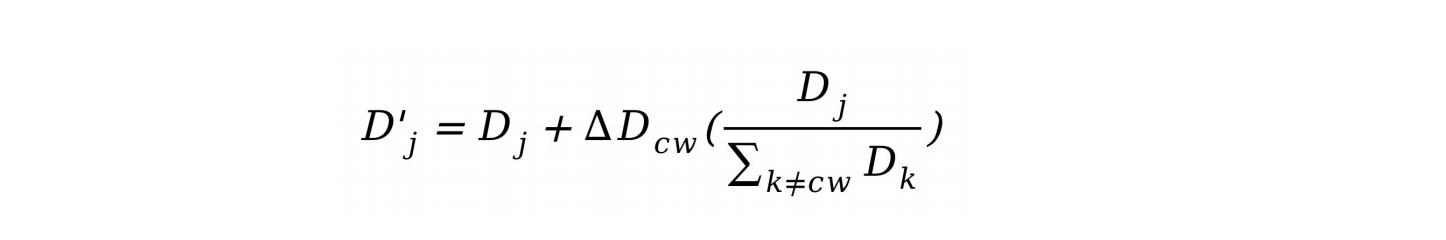

D'j is the new jobs for each destination station. ∆Dcw , the decrease in jobs at Canary Wharf, is proportionally distributed among stations based on their share of the total attractiveness, keeping the overall number of jobs constant.

In [76]:
def new_jobs(row):
    if row["station_destination"] == "Canary Wharf":
        val = row["jobs"]/2
    else:
        val = row["jobs"]
    return val
        
cdatasub["jobs_destsalScenario_A"] = cdatasub.apply(new_jobs, axis =1)
cdatasub
#[cdatasub['station_destination'] == "Canary Wharf"]
#cdatasub.head(10)

station_origin station_destination  flows  population   jobs  \
0            Abbey Road   Bank and Monument      0         599  78549   
1            Abbey Road             Beckton      1         599    442   
2            Abbey Road           Blackwall      3         599    665   
3            Abbey Road        Canary Wharf      1         599  58772   
4            Abbey Road        Canning Town     37         599  15428   
...                 ...                 ...    ...         ...    ...   
61469  Woolwich Arsenal       Tower Gateway    127        7892   3342   
61470  Woolwich Arsenal            West Ham    608        7892   5487   
61471  Woolwich Arsenal     West India Quay      6        7892    400   
61472  Woolwich Arsenal     West Silvertown     81        7892    893   
61473  Woolwich Arsenal           Westferry     76        7892   1250   

           distance  log_population   log_jobs  log_distance   O_i    D_j  \
0       8131.525097        6.395262  11.271478      9.003504   599  78549   
1       8510.121774        6.395262   6.091310      9.049012   599    442   
2       3775.448872        6.395262   6.499787      8.236275   599    665   
3       5086.514220        6.395262  10.981421      8.534348   599  58772   
4       2228.923167        6.395262   9.643939      7.709274   599  15428   
...             ...             ...        ...           ...   ...    ...   
61469  13401.795549        8.973605   8.114325      9.503144  7892   3342   
61470   8701.454361        8.973605   8.610137      9.071245  7892   5487   
61471   9536.720451        8.973605   5.991465      9.162905  7892    400   
61472   5355.248554        8.973605   6.794587      8.585832  7892    893   
61473   9958.371322        8.973605   7.130899      9.206169  7892   1250   

         Ai_exp    Bj_exp  SIM_est_exp  jobs_destsalScenario_A  
0      0.000008  0.752879         78.0                 78549.0  
1      0.000008  4.892196          3.0                   442.0  
2      0.000008  2.176815          4.0                   665.0  
3      0.000008  0.883624        109.0                 29386.0  
4      0.000008  0.954240         48.0                 15428.0  
...         ...       ...          ...                     ...  
61469  0.000017  3.252337        189.0                  3342.0  
61470  0.000017  0.908000        177.0                  5487.0  
61471  0.000017  2.159029         27.0                   400.0  
61472  0.000017  2.502742        132.0                   893.0  
61473  0.000017  2.210806         81.0                  1250.0  

[61474 rows x 15 columns]

Keeping the overall number of jobs constant.

In [77]:
# The data were grouped by terminal and the total attractiveness of each terminal was calculated.
jobs_by_destination = cdatasub.groupby("station_destination")["jobs"].first()

# Calculating total attractiveness outside the Canary Wharf site
total_jobs_except_canary_wharf = jobs_by_destination[jobs_by_destination.index != "Canary Wharf"].sum()

reduced_jobs = jobs_by_destination[jobs_by_destination.index == "Canary Wharf"]/2

# Distribution of reduced workload in proportion to original attractiveness
def redistribute_jobs(row):
    if row["station_destination"] != "Canary Wharf":
        extra_jobs = reduced_jobs * (jobs_by_destination[row["station_destination"]] / total_jobs_except_canary_wharf)
        val = row["jobs_destsalScenario_A"] + extra_jobs
    else:
        val = row["jobs_destsalScenario_A"]
    return val

cdatasub["jobs_destsalScenario_A_redistributed"] = cdatasub.apply(redistribute_jobs, axis=1)

# Check that the total Dj remains constant
print("Original total jobs:", jobs_by_destination.sum())
print("Scenario A total jobs (redistributed):", cdatasub.groupby("station_destination")["jobs_destsalScenario_A_redistributed"].first().sum())

Original total jobs: 1542391
Scenario A total jobs (redistributed): 1542391.0


In [78]:
# Use the beta we got from the negative exponential model
beta = 0.00015184728753333897
# Get the balancing factors. NB Setting of new field names for Ai and Bj.
cdatasub = balance_doubly_constrained(cdatasub,'station_origin','station_destination','population','jobs_destsalScenario_A_redistributed','distance',
                                      -beta,'exponential','Ai_exp_3','Bj_exp_3')

# Now predict the model again using the new Ai and Dj fields.
cdatasub['SIM_est_exp_3'] = np.round(cdatasub['O_i'] * cdatasub['Ai_exp_3'] * cdatasub['jobs_destsalScenario_A_redistributed'] * cdatasub['Bj_exp_3'] * 
                                   np.exp(cdatasub['distance']*-beta))
# Check out the matrix
pd.pivot_table(cdatasub,values='SIM_est_exp_3',index ='station_origin',
               columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23


station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  0.0            0.0         0.0      0.0   
Acton Central               0.0            0.0         0.0      0.0   
Acton Town                  0.0            0.0         0.0     11.0   
Aldgate                     0.0            0.0         2.0      0.0   
Aldgate East                0.0            0.0         2.0     39.0   
...                         ...            ...         ...      ...   
Woodford                    0.0            0.0         2.0     40.0   
Woodgrange Park             0.0            2.0         0.0      0.0   
Woodside Park               0.0            0.0         2.0     17.0   
Woolwich Arsenal           31.0            0.0         0.0      0.0   
All                       351.0          767.0      2248.0   7933.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    0.0         0.0       0.0       0.0      0.0   
Acton Central                 0.0         0.0       0.0       0.0      0.0   
Acton Town                   10.0         0.0      17.0       0.0      0.0   
Aldgate                      33.0         0.0       0.0       0.0      0.0   
Aldgate East                  0.0         0.0       0.0       0.0      0.0   
...                           ...         ...       ...       ...      ...   
Woodford                     47.0         0.0       0.0       0.0      0.0   
Woodgrange Park               0.0         0.0       0.0       0.0      0.0   
Woodside Park                16.0         0.0       1.0       0.0      0.0   
Woolwich Arsenal              0.0        31.0       0.0       0.0      0.0   
All                        8089.0       454.0     756.0     253.0    177.0   

station_destination   Angel  ...  Wimbledon  Wimbledon Park  Wood Green  \
station_origin               ...                                          
Abbey Road              0.0  ...        0.0             0.0         0.0   
Acton Central           0.0  ...        0.0             0.0         0.0   
Acton Town             13.0  ...       41.0             4.0         2.0   
Aldgate                24.0  ...        7.0             0.0         3.0   
Aldgate East           25.0  ...        8.0             1.0         3.0   
...                     ...  ...        ...             ...         ...   
Woodford               27.0  ...        8.0             0.0         8.0   
Woodgrange Park         0.0  ...        0.0             0.0         0.0   
Woodside Park          26.0  ...       10.0             0.0         5.0   
Woolwich Arsenal        0.0  ...        0.0             0.0         0.0   
All                  8267.0  ...     6425.0           606.0      2178.0   

station_destination  Wood Lane  Wood Street  Woodford  Woodgrange Park  \
station_origin                                                           
Abbey Road                 0.0          0.0       0.0              0.0   
Acton Central              0.0          0.0       0.0              0.0   
Acton Town                19.0          0.0       0.0              0.0   
Aldgate                    2.0          0.0       1.0              0.0   
Aldgate East               2.0          0.0       1.0              0.0   
...                        ...          ...       ...              ...   
Woodford                   0.0          0.0       0.0              0.0   
Woodgrange Park            0.0          0.0       0.0              0.0   
Woodside Park              0.0          0.0       0.0              0.0   
Woolwich Arsenal           0.0          0.0       0.0              0.0   
All                     1608.0        413.0     707.0            246.0   

station_destination  Woodside Park  Woolwich Arsenal        All  
station_origin                                          

Using the adjusted job data and a distance decay coefficient β of 0.000152, we recalibrated the double-constrained gravity model to predict the commuting flows with a 50% job reduction at Canary Wharf (as follows).

In [79]:
cdatasub[['flows', 'SIM_est_exp','SIM_est_exp_3']]

flows  SIM_est_exp  SIM_est_exp_3
0          0         78.0           90.0
1          1          3.0            3.0
2          3          4.0            4.0
3          1        109.0           60.0
4         37         48.0           53.0
...      ...          ...            ...
61469    127        189.0          202.0
61470    608        177.0          203.0
61471      6         27.0           29.0
61472     81        132.0          141.0
61473     76         81.0           86.0

[61474 rows x 3 columns]

### 2.2.2 Scenario B

Selecting the appropriate β value is crucial for accurately predicting commuting flows, as it directly relates to flow intensity (Masucci et al. 2013; Yan et al. 2014). Increases in transportation costs lead to a stronger distance decay effect, captured by adjusting β. In our scenario, we select β values at twice (0.000304) and three times (0.000456) of the original value, to represent moderate and significant rises in transport costs. It is important to note that excessively high β values may underestimate long-distance commuting flows, potentially distorting the model. The new predictions are partially illustrated below:

In [80]:
# Use the beta we got from the negative exponential model
beta = 0.00015184728753333897 * 2
# Get the balancing factors. NB Setting of new field names for Ai and Bj.
cdatasub = balance_doubly_constrained(cdatasub,'station_origin','station_destination','O_i','D_j','distance',
                                      -beta,'exponential','Ai_exp_4','Bj_exp_4')

# Now predict the model again using the new Ai and Dj fields.
cdatasub['SIM_est_exp_4'] = np.round(cdatasub['O_i'] * cdatasub['Ai_exp_4'] * cdatasub['D_j'] * cdatasub['Bj_exp_4'] * 
                                   np.exp(cdatasub['distance']*-beta))
# Check out the matrix
pd.pivot_table(cdatasub,values='SIM_est_exp_4',index ='station_origin',
               columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47


station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  0.0            0.0         0.0      0.0   
Acton Central               0.0            0.0         0.0      0.0   
Acton Town                  0.0            0.0         0.0      4.0   
Aldgate                     0.0            0.0         0.0      0.0   
Aldgate East                0.0            0.0         0.0     61.0   
...                         ...            ...         ...      ...   
Woodford                    0.0            0.0         0.0     39.0   
Woodgrange Park             0.0            0.0         0.0      0.0   
Woodside Park               0.0            0.0         0.0     11.0   
Woolwich Arsenal           19.0            0.0         0.0      0.0   
All                       342.0          745.0      2189.0   7776.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    0.0         0.0       0.0       0.0      0.0   
Acton Central                 0.0         0.0       0.0       0.0      0.0   
Acton Town                    3.0         0.0      13.0       0.0      0.0   
Aldgate                      49.0         0.0       0.0       0.0      0.0   
Aldgate East                  0.0         0.0       0.0       0.0      0.0   
...                           ...         ...       ...       ...      ...   
Woodford                     53.0         0.0       0.0       0.0      0.0   
Woodgrange Park               0.0         0.0       0.0       0.0      0.0   
Woodside Park                 9.0         0.0       0.0       0.0      0.0   
Woolwich Arsenal              0.0        22.0       0.0       0.0      0.0   
All                        7934.0       447.0     734.0     255.0    171.0   

station_destination   Angel  ...  Wimbledon  Wimbledon Park  Wood Green  \
station_origin               ...                                          
Abbey Road              0.0  ...        0.0             0.0         0.0   
Acton Central           0.0  ...        0.0             0.0         0.0   
Acton Town              5.0  ...       29.0             1.0         0.0   
Aldgate                27.0  ...        1.0             0.0         1.0   
Aldgate East           28.0  ...        1.0             0.0         1.0   
...                     ...  ...        ...             ...         ...   
Woodford               19.0  ...        1.0             0.0         2.0   
Woodgrange Park         0.0  ...        0.0             0.0         0.0   
Woodside Park          25.0  ...        2.0             0.0         1.0   
Woolwich Arsenal        0.0  ...        0.0             0.0         0.0   
All                  8102.0  ...     6284.0           582.0      2139.0   

station_destination  Wood Lane  Wood Street  Woodford  Woodgrange Park  \
station_origin                                                           
Abbey Road                 0.0          0.0       0.0              0.0   
Acton Central              0.0          0.0       0.0              0.0   
Acton Town                33.0          0.0       0.0              0.0   
Aldgate                    1.0          0.0       0.0              0.0   
Aldgate East               1.0          0.0       0.0              0.0   
...                        ...          ...       ...              ...   
Woodford                   0.0          0.0       0.0              0.0   
Woodgrange Park            0.0          0.0       0.0              0.0   
Woodside Park              0.0          0.0       0.0              0.0   
Woolwich Arsenal           0.0          0.0       0.0              0.0   
All                     1581.0        401.0     701.0            240.0   

station_destination  Woodside Park  Woolwich Arsenal        All  
station_origin                                          

In [81]:
# Use the beta we got from the negative exponential model
beta = 0.00015184728753333897 * 3
# Get the balancing factors. NB Setting of new field names for Ai and Bj.
cdatasub = balance_doubly_constrained(cdatasub,'station_origin','station_destination','O_i','D_j','distance',
                                      -beta,'exponential','Ai_exp_5','Bj_exp_5')

# Now predict the model again using the new Ai and Dj fields.
cdatasub['SIM_est_exp_5'] = np.round(cdatasub['O_i'] * cdatasub['Ai_exp_5'] * cdatasub['D_j'] * cdatasub['Bj_exp_5'] * 
                                   np.exp(cdatasub['distance']*-beta))
# Check out the matrix
pd.pivot_table(cdatasub,values='SIM_est_exp_5',index ='station_origin',
               columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
I

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  0.0            0.0         0.0      0.0   
Acton Central               0.0            0.0         0.0      0.0   
Acton Town                  0.0            0.0         0.0      1.0   
Aldgate                     0.0            0.0         0.0      0.0   
Aldgate East                0.0            0.0         0.0     84.0   
...                         ...            ...         ...      ...   
Woodford                    0.0            0.0         0.0     38.0   
Woodgrange Park             0.0            0.0         0.0      0.0   
Woodside Park               0.0            0.0         0.0      7.0   
Woolwich Arsenal           11.0            0.0         0.0      0.0   
All                       344.0          749.0      2194.0   7781.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    0.0         0.0       0.0       0.0      0.0   
Acton Central                 0.0         0.0       0.0       0.0      0.0   
Acton Town                    1.0         0.0       5.0       0.0      0.0   
Aldgate                      60.0         0.0       0.0       0.0      0.0   
Aldgate East                  0.0         0.0       0.0       0.0      0.0   
...                           ...         ...       ...       ...      ...   
Woodford                     60.0         0.0       0.0       0.0      0.0   
Woodgrange Park               0.0         0.0       0.0       0.0      0.0   
Woodside Park                 5.0         0.0       0.0       0.0      0.0   
Woolwich Arsenal              0.0        18.0       0.0       0.0      0.0   
All                        7929.0       443.0     739.0     256.0    171.0   

station_destination   Angel  ...  Wimbledon  Wimbledon Park  Wood Green  \
station_origin               ...                                          
Abbey Road              0.0  ...        0.0             0.0         0.0   
Acton Central           0.0  ...        0.0             0.0         0.0   
Acton Town              2.0  ...       10.0             0.0         0.0   
Aldgate                27.0  ...        0.0             0.0         0.0   
Aldgate East           28.0  ...        0.0             0.0         0.0   
...                     ...  ...        ...             ...         ...   
Woodford               13.0  ...        0.0             0.0         0.0   
Woodgrange Park         0.0  ...        0.0             0.0         0.0   
Woodside Park          25.0  ...        0.0             0.0         0.0   
Woolwich Arsenal        0.0  ...        0.0             0.0         0.0   
All                  8100.0  ...     6279.0           590.0      2128.0   

station_destination  Wood Lane  Wood Street  Woodford  Woodgrange Park  \
station_origin                                                           
Abbey Road                 0.0          0.0       0.0              0.0   
Acton Central              0.0          0.0       0.0              0.0   
Acton Town                43.0          0.0       0.0              0.0   
Aldgate                    0.0          0.0       0.0              0.0   
Aldgate East               0.0          0.0       0.0              0.0   
...                        ...          ...       ...              ...   
Woodford                   0.0          0.0       0.0              0.0   
Woodgrange Park            0.0          0.0       0.0              0.0   
Woodside Park              0.0          0.0       0.0              0.0   
Woolwich Arsenal           0.0          0.0       0.0              0.0   
All                     1566.0        402.0     705.0            240.0   

station_destination  Woodside Park  Woolwich Arsenal        All  
station_origin                                          

In [82]:
cdatasub[['flows', 'SIM_est_exp','SIM_est_exp_3','SIM_est_exp_4','SIM_est_exp_5']]

flows  SIM_est_exp  SIM_est_exp_3  SIM_est_exp_4  SIM_est_exp_5
0          0         78.0           90.0           54.0           44.0
1          1          3.0            3.0            2.0            1.0
2          3          4.0            4.0            3.0            3.0
3          1        109.0           60.0          107.0          100.0
4         37         48.0           53.0           63.0           74.0
...      ...          ...            ...            ...            ...
61469    127        189.0          202.0          126.0           91.0
61470    608        177.0          203.0          167.0          126.0
61471      6         27.0           29.0           22.0           19.0
61472     81        132.0          141.0          193.0          266.0
61473     76         81.0           86.0           65.0           56.0

[61474 rows x 5 columns]

### 2.2.3 Analysis of Flow Changes

Comparison of real value, original prediction, Scenario A prediction and Scenario B prediction flow values. We calculated the absolute changes (based on original prediction) to represent the level of change for each group.

In [83]:
# Calculate the absolute change in scene A
cdatasub['Scenario_A_abs_change'] = abs(cdatasub['SIM_est_exp_3'] - cdatasub['SIM_est_exp'])

# Calculate the absolute change of scene B (parameter value *2).
cdatasub['Scenario_B_param2_abs_change'] = abs(cdatasub['SIM_est_exp_4'] - cdatasub['SIM_est_exp'])

# Calculate the absolute change of scene B (parameter value *3).
cdatasub['Scenario_B_param3_abs_change'] = abs(cdatasub['SIM_est_exp_5'] - cdatasub['SIM_est_exp'])

# Calculate the total absolute change for each scene
total_abs_change_A = cdatasub['Scenario_A_abs_change'].sum()
total_abs_change_B_param2 = cdatasub['Scenario_B_param2_abs_change'].sum()
total_abs_change_B_param3 = cdatasub['Scenario_B_param3_abs_change'].sum()

print(f"Total absolute change in scenario A: {total_abs_change_A}")
print(f"Total absolute change in Scene B (β *2): {total_abs_change_B_param2}")
print(f"Total absolute change in Scene B (β *3): {total_abs_change_B_param3}")

# Compare the total absolute changes and identify the scenarios with the greatest impact.
max_change_scenario = max(total_abs_change_A, total_abs_change_B_param2, total_abs_change_B_param3)

if max_change_scenario == total_abs_change_A:
    print("Scenario A has the greatest impact on the redistribution of commuter flows")
elif max_change_scenario == total_abs_change_B_param2:
    print("Scenario B (β *2) has the greatest impact on the redistribution of commuter flows")
else:
    print("Scenario B (β *3) has the greatest impact on the redistribution of commuter flows")

Total absolute change in scenario A: 65827.0
Total absolute change in Scene B (β *2): 624205.0
Total absolute change in Scene B (β *3): 1032728.0
Scenario B (β *3) has the greatest impact on the redistribution of commuter flows


Scenario B (β=0.000456) resulted in a total absolute change of 1,032,728.0 in commuting flows, markedly greater than other scenarios. It indicates that commuting flows are more sensitive to significant increases in travel costs than to job reductions of Scenario A. Above a certain cost threshold, individuals may relocate their jobs or homes to reduce expenses (Zhu & Levinson 2015), causing considerable flow redistributions. Different socio-economic groups vary in their sensitivity to transportation cost changes. Mattioli et al. (2017) observed that low-income families are especially impacted by fuel price hikes due to their higher proportion of transportation expenses. Therefore, Scenario B (β=0.000456) likely prompts substantial commuting flow redistributions among low-income groups.

The impact of Scenario A is relatively small. Despite Canary Wharf's role as a major employment hub, job reductions there may be mitigated by other employment centers (Ahlfeldt et al. 2015), minimizing effects on commuting flows. Moreover, while policy changes aimed at regulating commuting flows must consider tool practicality, adjustments in employment are often influenced by complex factors, making unilateral government action difficult. Conversely, transportation costs are more straightforward to manage, making them a more practical research focus.

Governments can enhance subway commuting efficiency through the following strategic actions based on this study: (1) Boost public transportation investment to expand coverage and frequency, and provide subsidies to low-income commuters, which can significantly impact commuting mode choices (Buehler 2011). (2) Increase housing supply near major employment hubs, particularly affordable housing for low-income groups, to notably reduce commuting distances and times (Cervero & Duncan 2006). (3) Promote flexible work policies, such as allowing remote work and staggered hours, to ease peak-hour congestion. This can greatly decrease both commuting frequency and distance, helping to lower transportation costs and ease the redistribution of commuting flows (de Abreu e Silva & Melo 2018).

## Reference

Ahlfeldt, G. M., Redding, S. J., Sturm, D. M., & Wolf, N. (2015). The economics of density: Evidence from the Berlin Wall. Econometrica, 83(6), 2127-2189. 

Albert, R., Jeong, H. and Barabási, A.L. (2000) 'Error and attack tolerance of complex networks', Nature, 406(6794), pp. 378-382. 

Angeloudis, P. and Fisk, D. (2006) 'Large subway systems as complex networks', Physica A: Statistical Mechanics and Its Applications, 367, pp. 553-558. 

Bavelas, A. (1950) 'Communication patterns in task-oriented groups', The Journal of the Acoustical Society of America, 22(6), pp. 725-730. 

Bonacich, P. (1972) 'Factoring and weighting approaches to status scores and clique identification', The Journal of Mathematical Sociology, 2(1), pp. 113-120. 

Brandes, U. (2001) 'A faster algorithm for betweenness centrality', Journal of Mathematical Sociology, 25(2), pp. 163-177. 

Buehler, R. (2011) 'Determinants of transport mode choice: a comparison of Germany and the USA', Journal of Transport Geography, 19(4), pp. 644-657. 

Cats, O. and Jenelius, E. (2014) 'Dynamic vulnerability analysis of public transport networks: mitigation effects of real-time information', Networks and Spatial Economics, 14(3), pp. 435-463. 

Cervero, R. (1996) 'Mixed land-uses and commuting: Evidence from the American Housing Survey', Transportation Research Part A: Policy and Practice, 30(5), pp. 361-377. 

Cervero, R. and Duncan, M. (2006) 'Which Reduces Vehicle Travel More: Jobs-Housing Balance or Retail-Housing Mixing?', Journal of the American Planning Association, 72(4), pp. 475-490. 

Cohen, R., Erez, K., Ben-Avraham, D. and Havlin, S. (2000) 'Resilience of the internet to random breakdowns', Physical Review Letters, 85(21), p. 4626. 

de Abreu e Silva, J. and Melo, P.C. (2018) 'Home telework, travel behavior, and land-use patterns: A path analysis of British single-worker households', Journal of Transport and Land Use, 11(1), pp. 419-441. 

De Los Santos, A., Laporte, G., Mesa, J.A. and Perea, F. (2012) 'Evaluating passenger robustness in a rail transit network', Transportation Research Part C: Emerging Technologies, 20(1), pp. 34-46. 

Derrible, S. (2012) 'Network centrality of metro systems', PLoS ONE, 7(7), p. e40575. 

Derrible, S. and Kennedy, C. (2010) 'Characterizing metro networks: state, form, and structure', Transportation, 37(2), pp. 275-297. 

Derrible, S. and Kennedy, C. (2010) 'The complexity and robustness of metro networks', Physica A: Statistical Mechanics and Its Applications, 389(17), pp. 3678-3691. 

Derrible, S. and Kennedy, C. (2011) 'Applications of graph theory and network science to transit network design', Transport Reviews, 31(4), pp. 495-519. 

Freeman, L.C. (1977) 'A set of measures of centrality based on betweenness', Sociometry, 40(1), pp. 35-41. 

Holme, P., Kim, B.J., Yoon, C.N. and Han, S.K. (2002) 'Attack vulnerability of complex networks', Physical Review E, 65(5), p. 056109. 

Jamakovic, A. and Uhlig, S. (2007) 'On the relationship between the algebraic connectivity and graph's robustness to node and link failures', 2007 Next Generation Internet Networks, pp. 96-102. 

Latora, V. and Marchiori, M. (2001) 'Efficient behavior of small-world networks', Physical Review Letters, 87(19), p. 198701. 

Latora, V. and Marchiori, M. (2005) 'Vulnerability and protection of infrastructure networks', Physical Review E, 71(1), p. 015103. 

Masucci, A.P., Serras, J., Johansson, A. and Batty, M. (2013) 'Gravity versus radiation models: On the importance of scale and heterogeneity in commuting flows', Physical Review E, 88(2), p. 022812. 

Mattioli, G., Lucas, K. and Marsden, G. (2017) 'Transport poverty and fuel poverty in the UK: From analogy to comparison', Transport Policy, 59, pp. 93-105. 

Mattsson, L.G. and Jenelius, E. (2015) 'Vulnerability and resilience of transport systems–a discussion of recent research', Transportation Research Part A: Policy and Practice, 81, pp. 16-34. 

Newman, M.E.J. (2003) 'The structure and function of complex networks', SIAM Review, 45(2), pp. 167-256. 

Ruhnau, B. (2000) 'Eigenvector-centrality — a node-centrality?', Social Networks, 22(4), pp. 357-365. 

Sabidussi, G. (1966) 'The centrality index of a graph', Psychometrika, 31(4), pp. 581-603. 

Transport for London. (2012). London 2012 Games transport – Performance, funding and legacy. Board paper. https://tfl.gov.uk/corporate/publications-and-reports/board-papers 

Watts, D.J. and Strogatz, S.H. (1998) 'Collective dynamics of 'small-world' networks', Nature, 393(6684), pp. 440-442. 

Yan, X.Y., Zhao, C., Fan, Y., Di, Z. and Wang, W.X. (2014) 'Universal predictability of mobility patterns in cities', Journal of The Royal Society Interface, 11(100), p. 20140834. 

Zhang, X., Miller-Hooks, E. and Denny, K. (2015) 'Assessing the role of network topology in transportation network resilience', Journal of Transport Geography, 46, pp. 35-45. 

Zhao, J., Deng, W., Song, Y. and Zhu, Y. (2014) 'Analysis of Metro ridership at station level and station-to-station level in Nanjing: an approach based on direct demand models', Transportation, 40(1), pp. 133-155. 

Zhu, S. and Levinson, D. (2015) 'Do people use the shortest path? An empirical test of Wardrop's first principle', PloS One, 10(8), p. e0134322.